#  Uso de Inteligência Artificial, Aspectos Éticos do Trabalho e Diretrizes para Divulgação



O conteúdo apresentado aqui representa apenas um recorte do problema de detecção de câncer de pele. O principal objetivo é explorar o uso de redes neurais para o processamento de imagens. Não recomendamos utilizar os resultados apresentados para diagnóstico médico. Embora esses resultados possam servir como um guia para o desenvolvimento de tecnologias, é crucial que sejam interpretados com cautela e que qualquer aplicação prática seja supervisionada por um especialista na área.



Os melhores modelos obtidos nesses trabalhos são aqueles que utilizam técnicas não interpretáveis (como Support Vector Machines e Redes Neurais), o que pode limitar sua aplicação na área médica. Na medicina, sempre que possível, é fundamental que um diagnóstico seja interpretável e que se possa justificar a inferência feita pelo modelo. A capacidade de fornecer uma explicação clara e compreensível sobre como o modelo chegou a uma determinada conclusão é crucial para a aceitação e confiança no diagnóstico. Outro ponto importante para diagnósticos médicos é medir a incerteza do diagnóstico. Além de gerar uma predição nominal, que é a classe mais provável à qual uma observação pertence, é interessante fornecer um vetor com as probabilidades da observação pertencer a cada uma das classes e, se possível, algum intervalo de confiança para essa predição. Essas estimativas podem ajudar a controlar o erro do tipo 1 e gerar "uma métrica para confiança no resultado". Por exemplo, considere o resultado: classe 1 = 50%, classe 2 = 49%, classe 3 = 1%. Um classificador nominal exibiria somente a predição como classe 1, enquanto um classificador probabilístico forneceria as probabilidades e seus intervalos de confiança, incentivando o médico a investigar mais profundamente se o resultado é de fato da classe 1 ou da classe 2.


Por fim, **a menos que um estudo criterioso de validação dos resultados obtidos aqui seja desenvolvido, não recomendamos a utilização dos resultados para diagnóstico na área médica**. Os resultados obtidos refletem a predição para a base de dados mencionada anteriormente neste texto, e, sem estudos futuros, referem-se exclusivamente a ela, refletindo os aspectos da coleta dos dados realizada pelos pesquisadores que disponibilizaram a base de dados. Neste texto, em momento algum é tratado sobre a generalização dos resultados, sobre a aplicação dos resultados em diagnósticos médicos e tampouco sobre os aspectos éticos da implementação dos algoritmos adotados, pois não é o objetivo do trabalho. No entanto, essa é uma etapa fundamental para qualquer aplicação em áreas que envolvam a vida.



O ChatGPT foi utilizado para a geração de textos. Quando o ChatGPT foi utilizado para gerar códigos, há uma sinalização. O ChatGPT não foi utilizado para análise de dados.


Você é livre para usar os resultados deste notebook, desde que cite os autores. Os autores não recomendam a implementação dos algoritmos apresentados para fins comerciais, especialmente se o uso envolver questões relacionadas à vida.



# Sobre os dados

A base de dados foi coletada e disponibilizada pela Universidade Médica de Viena. Os dados extraídos da plataforma kaggle pelo link *https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000* e foram originalmente disponibilizados para o desafio ISIC 2018. O objetivo era a previsão correta de um diagnóstico de lesão dermatológica pigmentada.

Foram coletadas imagens de dermatoscopia de diferentes populações, consistindo em um dataset de 10015 registros que foi então divulgado para uso acadêmico.
Estão presentes casos de todos os diagnósticos importantes de lesões pigmentadas (**dx**):
* Carcinoma espinocelular ou doença de Bowen (**akiec**)
* Carcinoma basocelular (**bcc**)
* Queratose benigna (queratose seborreica/ lentigo solar/ líquen plano) (**bkl**)
* Dermatofibroma (**df**)
* Melanoma (**mel**)
* Nevo melanocítico (**nv**)
* Lesões vasculares (angiomas, angioqueratomas, granulomas piogênicos e hemorragias)(**vasc**)

A dermatoscopia é um exame de ampliação de imagem na região lesionada que pode ser então analisado por um especialista para auxiliar em no diagnóstico.

As lesões são também classificadas pela forma do diagnóstico (**dx_type**):
* Histopatologia(**histo**)
* Exame de acompanhamento (**follow_up**)
* Consenso de especialistas (**consensus**)
* Microscopia confocal in vivo (**confocal**)

As informações citadas, assim como idade (**age**), sexo (**sex**) e localização da lesão (**localization**) estão armazenadas em um arquivo de metadados que acompanha as imagens

## Aplicação real

As submissões para o desafio original ISIC 2018 foi comparada com a análise dos dados por especialistas de dermatologia (*https://doi.org/10.1016/S1470-2045(19)30333-X*).

A performance média dos algoritmos é de 2,01 diagnósticos corretos a mais que a média dos especialistas. 27 humanos especialistas com mais de 10 anos de experiência atingiram uma média de 18,78, enquanto os 3 melhores algortimos alcançaram 25,43 respostas corretas.

A diferença foi menor para casos em que a fonte não estava presente no conjunto de treino (11,4% melhor para 3,6% melhor), apesar de os algortimos ainda terem uma performance superior

# Configurando o ambiente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
# Paleta de cores "pastel"
sns.set_theme(style="white", palette="pastel")
import plotly.express as px

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader , Dataset
import numpy as np
import torchvision
import torch
import torch.nn as nn
from torchvision.transforms import InterpolationMode


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.decomposition import PCA
import joblib

In [ ]:
# import warnings
# # Suprimindo avisos
# warnings.filterwarnings('ignore')

# processamento dos dados

## Download

In [ ]:
# Essa biblioteca faz o download dos dados direto do huggingface
from datasets import load_dataset,concatenate_datasets

In [ ]:
# Faz o download dos dados
train = load_dataset("marmal88/skin_cancer", split  = 'train')
train = train.shuffle(seed=42)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/9577 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2492 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1285 [00:00<?, ? examples/s]

In [ ]:
test = load_dataset("marmal88/skin_cancer", split  = 'test')
test = test.shuffle(seed=42)

In [ ]:
val = load_dataset("marmal88/skin_cancer", split  = 'validation')
val = val.shuffle(seed=42)

## Processamento tabular

In [ ]:
# Para facilitar a manipulação dos dados , os dados tabulares serão transformados em datafarame
train_df = pd.DataFrame(data = {'dx_type': train['dx_type'] , 'age' : train['age'] , 'sex' : train['sex'] , 'localization' : train['localization']} )
test_df = pd.DataFrame(data = {'dx_type': test['dx_type'] , 'age' : test['age'] , 'sex' : test['sex'] , 'localization' : test['localization']} )
val_df = pd.DataFrame(data = {'dx_type': val['dx_type'] , 'age' : val['age'] , 'sex' : val['sex'] , 'localization' : val['localization']} )


In [ ]:
# Para features quantitativas o procedimento adotado é imputação de np.nas pela media e padronização para média 0 e dp 1
numeric_features = ["age"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [ ]:
# Para as features qualitativas o procedimento adotado é imputação pela moda e OneHotEncoder
categorical_features  = ["sex","localization","dx_type" ]
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy = "most_frequent") ),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output = False))

    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)

    ]
)

In [ ]:
# Representação do esquema de processamento
preprocessor.fit(train_df)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex', 'localization', 'dx_type'])])

In [ ]:
train_df_process = preprocessor.transform(train_df)
test_df_process = preprocessor.transform(test_df)
val_df_process = preprocessor.transform(val_df)

In [ ]:
print(train_df_process.shape , test_df_process.shape , val_df_process.shape)

(9577, 23) (1285, 23) (2492, 23)


In [ ]:
names = preprocessor.get_feature_names_out()

In [ ]:
# Se for necessário os nomes das colunas podem ser recuperados
print(names)

['num__age' 'cat__sex_female' 'cat__sex_male' 'cat__sex_unknown'
 'cat__localization_abdomen' 'cat__localization_acral'
 'cat__localization_back' 'cat__localization_chest'
 'cat__localization_ear' 'cat__localization_face' 'cat__localization_foot'
 'cat__localization_genital' 'cat__localization_hand'
 'cat__localization_lower extremity' 'cat__localization_neck'
 'cat__localization_scalp' 'cat__localization_trunk'
 'cat__localization_unknown' 'cat__localization_upper extremity'
 'cat__dx_type_confocal' 'cat__dx_type_consensus' 'cat__dx_type_follow_up'
 'cat__dx_type_histo']


In [ ]:
# Para treinar os modelos é preciso converter as string em números.
label_encoder = LabelEncoder()

In [ ]:
label_encoder.fit(train['dx'])

LabelEncoder()

In [ ]:
train_labels = label_encoder.transform(train['dx'])

In [ ]:
test_labels = label_encoder.transform(test['dx'])

In [ ]:
val_labels = label_encoder.transform(val['dx'])

## Processamento imagens

In [ ]:
#https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html

#The inference transforms are available at ResNet18_Weights.IMAGENET1K_V1.transforms and perform the following preprocessing operations: Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[256] using interpolation=InterpolationMode.BILINEAR, followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]
# O gpt ajudou aqui



mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]



transform_resnet18 = transforms.Compose([
    transforms.Resize(size=256, interpolation=InterpolationMode.BILINEAR),  # transforma  para o tamnho 256
    transforms.CenterCrop(size=224),  # Recorta centralmente para 224x224
    transforms.ToTensor(),  # Converte a imagem para tensor
    transforms.Normalize(mean=mean, std=std)  # Normaliza os pixels com média e desvio padrão fornecidos
])


transform_lenet5 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),  # Converte a imagem para tensor
    transforms.Normalize(mean=mean, std=std)  # Normaliza os pixels
])


In [ ]:
# Isso foi necessário para lidar com os dados tabulares
# Esse link foi utilizado como referência https://pytorch.org/tutorials/beginner/data_loading_tutorial.html


class CustomDataset(Dataset):

    def __init__(self, data,tabular_data ,labels, transform=None):
        self.data = data
        self.transform = transform
        self.tabular_data = tabular_data
        self.labels = labels


    def __len__(self):
        return len( self.data)

    def __getitem__(self, idx):
        image = self.data[idx]['image']

        # Aplicar a transformação, se disponível
        if self.transform:
            image = self.transform(image)

        # Obter outros atributos
        tabular_data_idx = self.tabular_data[idx]
        label =  self.labels[idx]

        tabuluar_features  = torch.tensor(self.tabular_data[idx], dtype = torch.float32)




        return {'image': image, 'label' : label , 'tabular_features' : tabuluar_features}

In [ ]:
treino_pytorch  = CustomDataset(data = train,tabular_data =train_df_process, labels = train_labels   ,transform = transform_resnet18)
train_loader = DataLoader(treino_pytorch ,  batch_size=64 , shuffle = True, num_workers = 2)

In [ ]:
test_pytorch  = CustomDataset(data = test ,tabular_data =test_df_process, labels = test_labels   ,transform = transform_resnet18)
test_loader = DataLoader(test_pytorch ,  batch_size=64 , shuffle = True, num_workers = 2)

In [ ]:
val_pytorch  = CustomDataset(data = val ,tabular_data = val_df_process, labels = val_labels   ,transform = transform_resnet18)
val_loader = DataLoader(val_pytorch ,  batch_size=64 , shuffle = True, num_workers = 2)

<ipython-input-31-26ed744f8eca>:15: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  plt.imshow(imagem.T)


torch.Size([3, 224, 224])


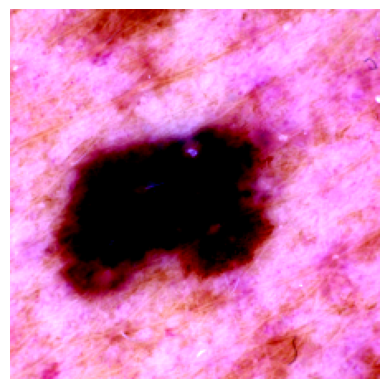

Tabulares : 
tensor([1.0720, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000])
torch.Size([23])
label
tensor(4)
64
Keys
dict_keys(['image', 'label', 'tabular_features'])


In [ ]:

import matplotlib.pyplot as plt

# Iterar sobre o DataLoader para acessar um batch de dados
for batch in train_loader:
    # Acessar os dados de imagem do batch
    imagens = batch['image']

    # Acessar uma imagem específica dentro do batch (por exemplo, a primeira imagem)
    imagem = imagens[0]


    print(imagem.shape)
    #print('atributos',batch['features'])
    # Mostrar a imagem usando matplotlib
    plt.imshow(imagem.T)
    plt.axis('off')
    plt.show()

    print('Tabulares : ')
    print(batch['tabular_features'][0])
    print(batch['tabular_features'][0].shape)

    print('label')
    print(batch['label'][0])
    print(len(batch['label']))

    print('Keys')
    print(batch.keys())
    # Sair após mostrar uma imagem para evitar a iteração completa sobre os dados

    break


# EDA

A representação das figuras no grid visualiza as diferentes classes de diagnósticos de lesões de pele, permitindo uma comparação direta entre diferentes categorias. Cada linha da grade representa um tipo específico de diagnóstico, e as colunas exibem uma amostra de cinco imagens pertencentes a esse diagnóstico. Com isso, conseguimos fazer uma comparação direta entre as lesões, sendo possível perceber certas diferenças nos formatos e colorações.

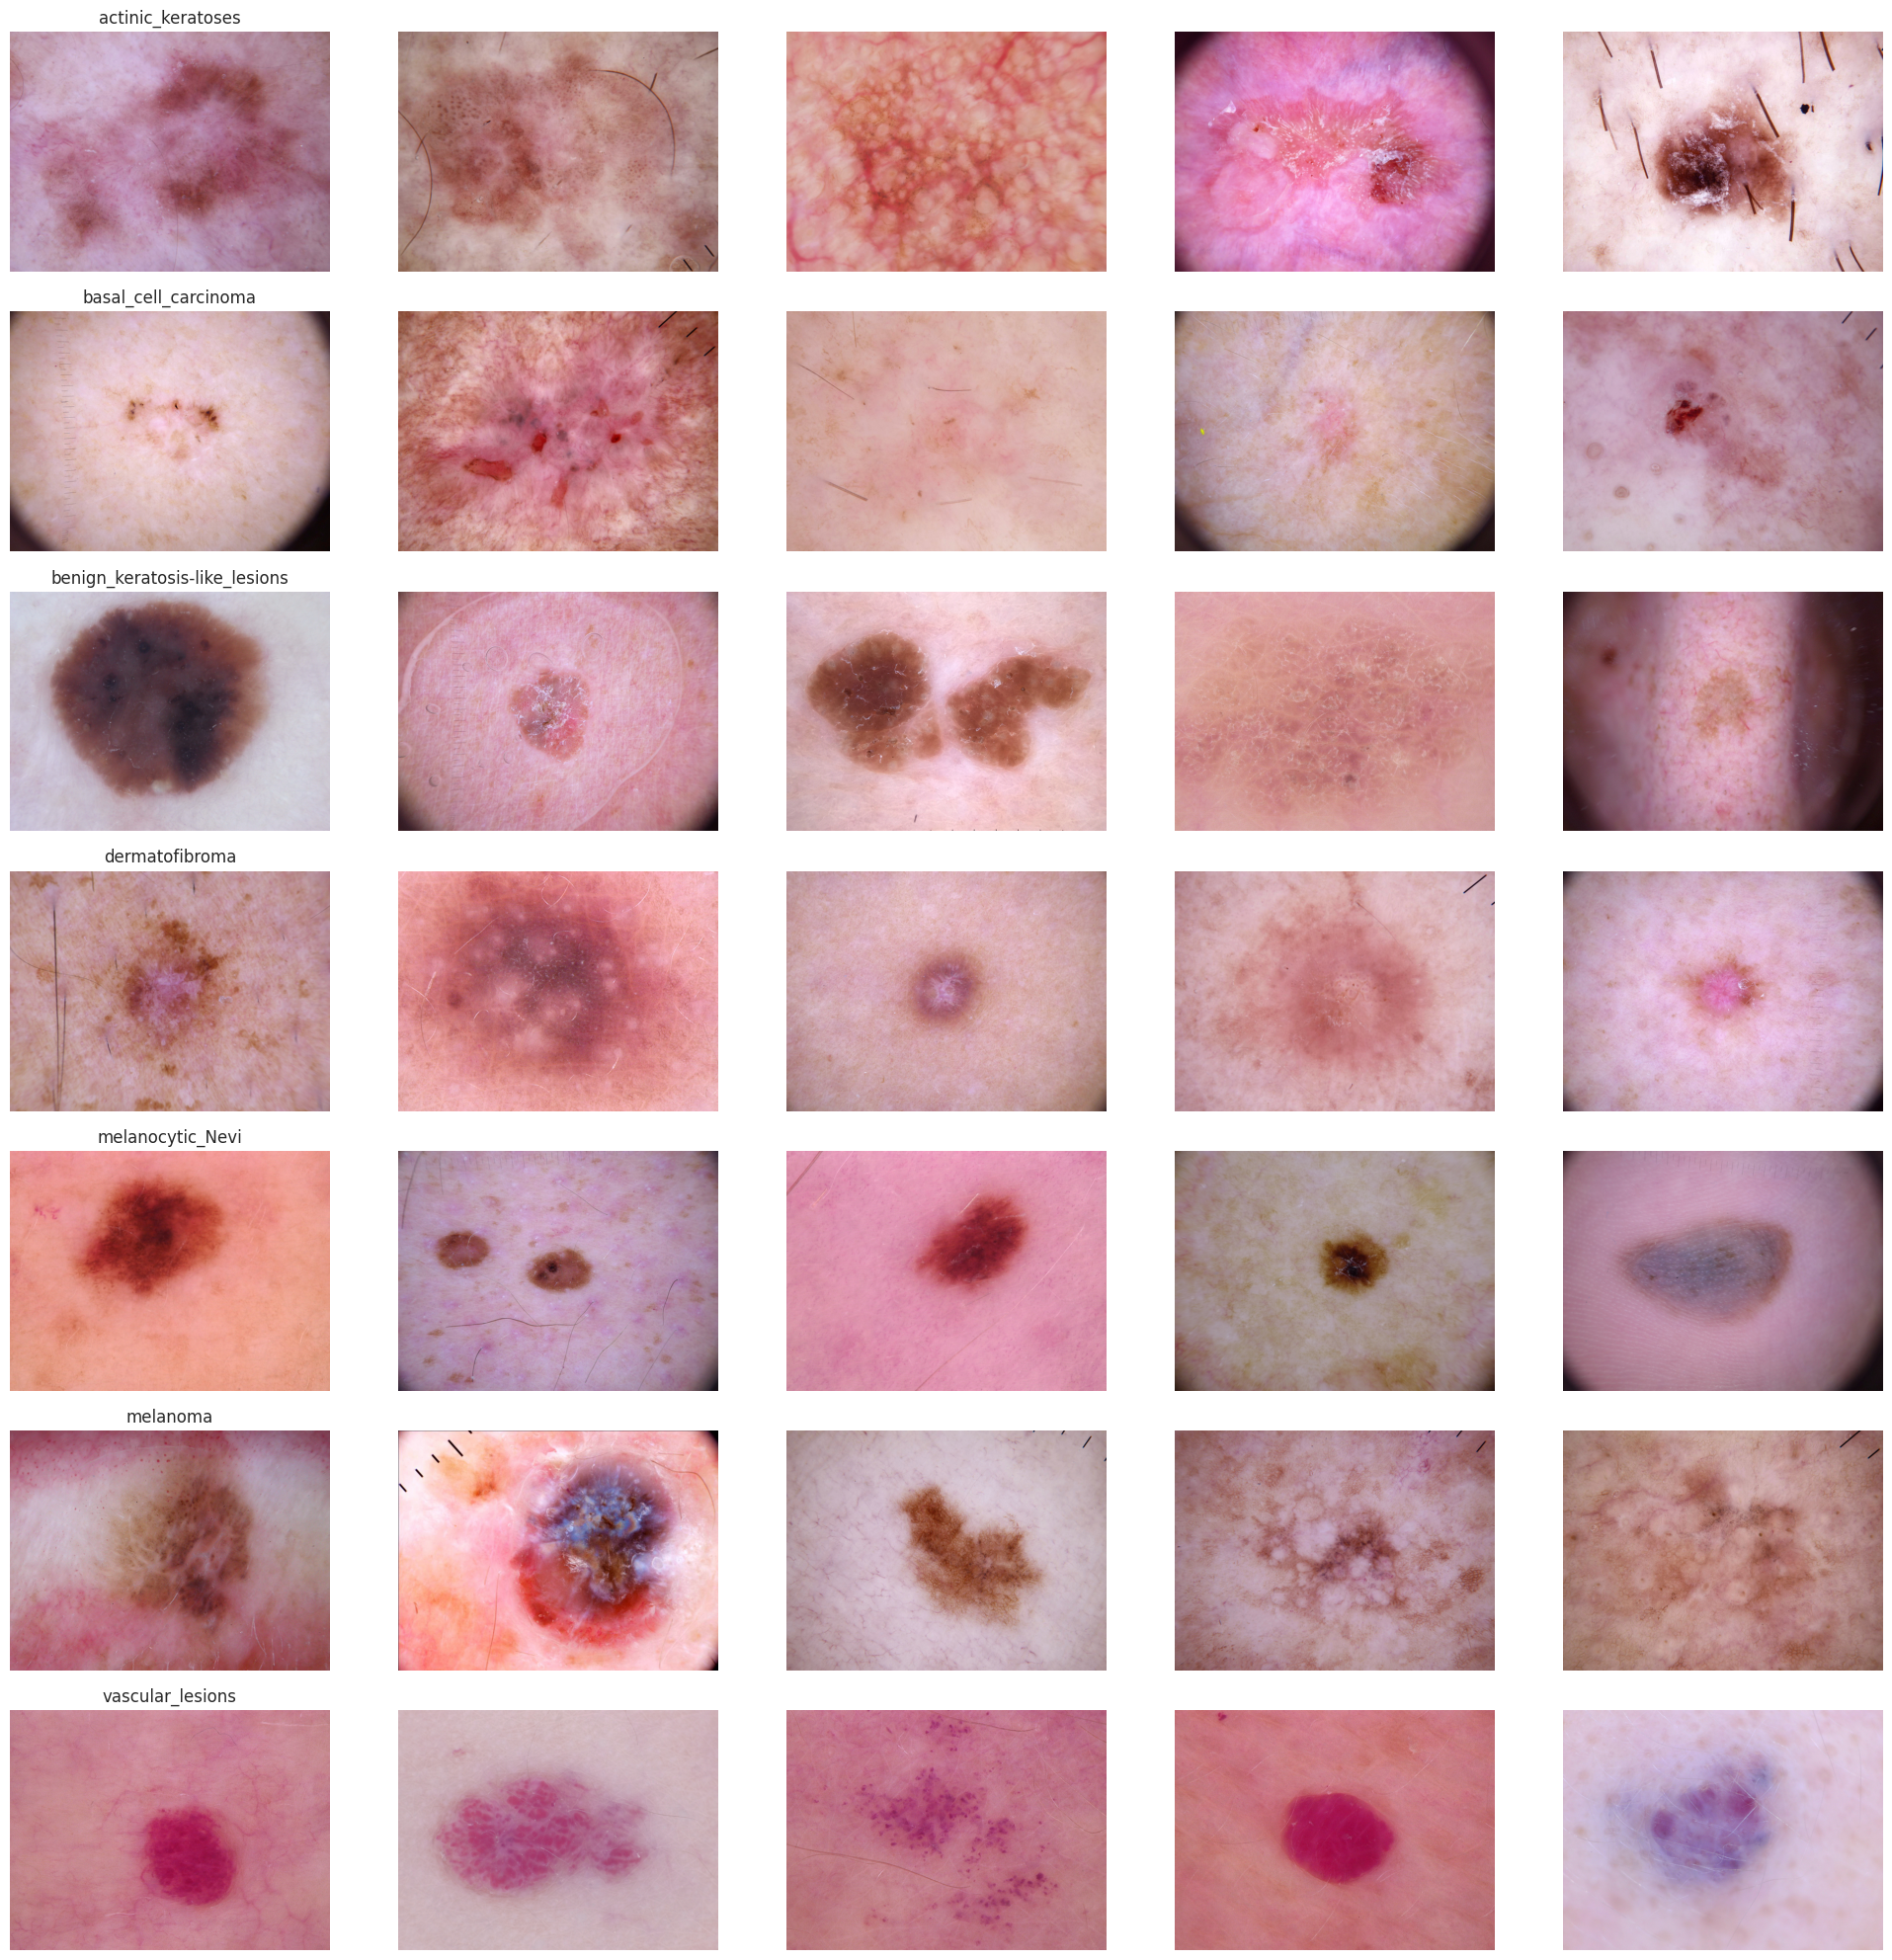

In [ ]:
# Criar DataFrame com os dados
df_aux = pd.DataFrame(test)

# Definir os tipos de diagnóstico que você deseja plotar
dx_types = df_aux['dx'].unique().tolist()

# Dicionário para armazenar imagens por tipo de diagnóstico
images_by_dx_type = {}

# Iterar sobre os tipos de diagnóstico
for dx_type in dx_types:
    # Filtrar dados para o tipo de diagnóstico atual
    dx_type_data = df_aux[df_aux['dx'] == dx_type]

    # Amostrar aleatoriamente 5 imagens para o tipo de diagnóstico
    sampled_images = dx_type_data.sample(n=5, random_state=42)['image'].tolist()

    # Armazenar as imagens no dicionário
    images_by_dx_type[dx_type] = sampled_images

# Plotar as imagens
fig, axes = plt.subplots(len(dx_types), 5, figsize=(20, 20))

# Iterar sobre o dicionário de imagens por tipo de diagnóstico
for i, (dx_type, images) in enumerate(images_by_dx_type.items()):
    for j in range(5):  # Plotar apenas 5 imagens por linha
        ax = axes[i, j]
        ax.imshow(images[j])
        ax.axis('off')
        if j == 0:
            ax.set_title(dx_type)  # Definir título apenas na primeira coluna

plt.tight_layout()
plt.show()

# del df_aux

Concatenando os dados de treino, teste e validação sem nenhum preprocessamento para fazer a analise exploratória.

In [ ]:
# Concatenar os dados para análise
train_df_aux = pd.DataFrame(data = {'dx': train['dx'], 'dx_type': train['dx_type'] , 'age' : train['age'] , 'sex' : train['sex'] , 'localization' : train['localization']} )
test_df_aux = pd.DataFrame(data = {'dx': test['dx'], 'dx_type': test['dx_type'] , 'age' : test['age'] , 'sex' : test['sex'] , 'localization' : test['localization']} )
val_df_aux = pd.DataFrame(data = {'dx': val['dx'], 'dx_type': val['dx_type'] , 'age' : val['age'] , 'sex' : val['sex'] , 'localization' : val['localization']} )

df_EDA = pd.concat([train_df_aux, test_df_aux, val_df_aux], ignore_index=True)

# del train_df_aux
# del test_df_aux
# del val_df_aux

df_EDA

dx    dx_type   age     sex     localization
0      actinic_keratoses      histo  75.0  female  lower extremity
1      actinic_keratoses      histo  70.0    male  lower extremity
2      actinic_keratoses      histo  75.0  female  lower extremity
3      actinic_keratoses      histo  50.0    male  upper extremity
4      actinic_keratoses      histo  50.0    male  upper extremity
...                  ...        ...   ...     ...              ...
13349   vascular_lesions      histo  55.0    male  lower extremity
13350   vascular_lesions      histo  80.0  female  lower extremity
13351   vascular_lesions      histo  15.0    male            chest
13352   vascular_lesions  consensus  70.0  female  lower extremity
13353   vascular_lesions  consensus  45.0  female          abdomen

[13354 rows x 5 columns]

O DataFrame `df_EDA` possui 13.354 entradas e 5 colunas: `dx` (diagnóstico), `dx_type` (tipo de diagnóstico), `age` (idade), `sex` (sexo) e `localization` (localização das lesões). A variável `age` é do tipo float64, enquanto as outras colunas são do tipo object (categóricas). A coluna `age` tem 79 valores ausentes.

In [ ]:
# Informações gerais sobre os dados
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dx            13354 non-null  object 
 1   dx_type       13354 non-null  object 
 2   age           13275 non-null  float64
 3   sex           13354 non-null  object 
 4   localization  13354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 521.8+ KB


In [ ]:
# Quantidade de observações faltantes
df_EDA.isna().sum()

dx               0
dx_type          0
age             79
sex              0
localization     0
dtype: int64

Fazendo uma simples imputação dos valores faltantes de `age` pela mediana e convertendo para inteiro

In [ ]:
# Imputando a mediana para simplificar a visualização
df_EDA['age'] = df_EDA['age'].fillna(df_EDA['age'].median().astype(int))

# Quantidade de observações faltantes
df_EDA.isna().sum()

dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

As estatísticas descritivas do DataFrame `df_EDA` mostram o seguinte:

- A coluna `dx` tem 7 categorias únicas, com `melanocytic_Nevi` sendo a mais comum (8.929 ocorrências).
- A coluna `dx_type` tem 4 categorias únicas, com `histo` sendo a mais frequente (7.139 ocorrências).
- A coluna `sex` tem 3 categorias únicas, com `male` sendo a mais comum (7.164 ocorrências).
- A coluna `localization` tem 15 categorias únicas, com `back` sendo a mais comum (2.965 ocorrências).
- A coluna `age`, a única numérica, tem uma média de 51,81 anos, um desvio padrão de 16,94 anos, e varia de 0 a 85 anos. As quartis são: 40 (25%), 50 (50%) e 65 (75%).

In [ ]:
# Estatísticas descritivas
df_EDA.describe(include='all')

dx dx_type           age    sex localization
count              13354   13354  13354.000000  13354        13354
unique                 7       4           NaN      3           15
top     melanocytic_Nevi   histo           NaN   male         back
freq                8929    7139           NaN   7164         2965
mean                 NaN     NaN     51.810693    NaN          NaN
std                  NaN     NaN     16.939320    NaN          NaN
min                  NaN     NaN      0.000000    NaN          NaN
25%                  NaN     NaN     40.000000    NaN          NaN
50%                  NaN     NaN     50.000000    NaN          NaN
75%                  NaN     NaN     65.000000    NaN          NaN
max                  NaN     NaN     85.000000    NaN          NaN

O gráfico de barras exibe a contagem de ocorrências para cada tipo de diagnóstico, destacando que:

- `melanocytic_Nevi` é a categoria mais frequente, com 8929 casos.
- `melanoma` e `benign_keratosis-like_lesions` também são comuns, com 1500 e 1465 casos, respectivamente.
- As outras categorias (`basal_cell_carcinoma`, `actinic_keratoses`, `vascular_lesions`, `dermatofibroma`) têm menos ocorrências, com `dermatofibroma` sendo a menos frequente, com 154 casos.

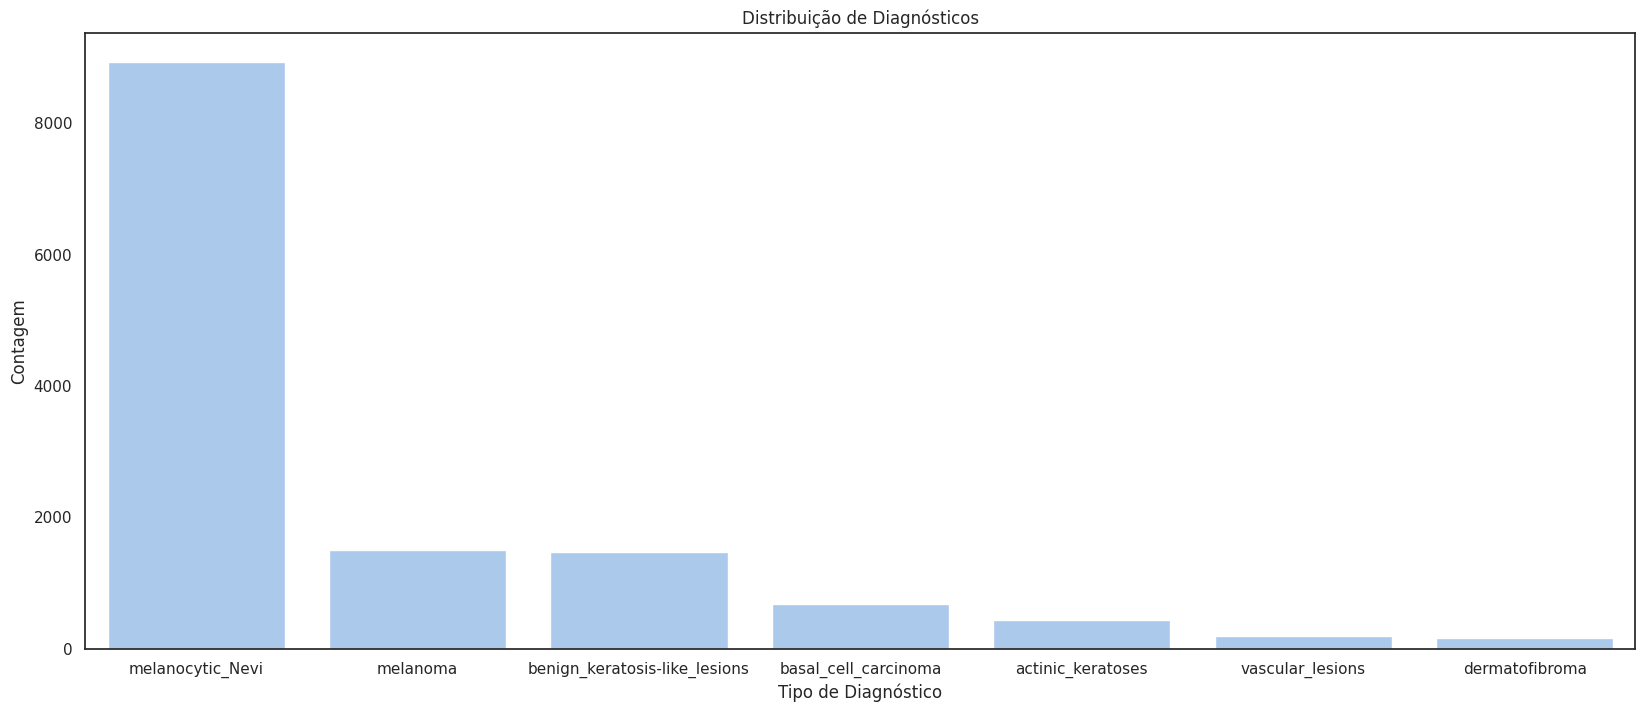

dx  count
0               melanocytic_Nevi   8929
1                       melanoma   1500
2  benign_keratosis-like_lesions   1465
3           basal_cell_carcinoma    678
4              actinic_keratoses    439
5               vascular_lesions    189
6                 dermatofibroma    154

In [ ]:
# Criando df de contagem
df_aux = df_EDA['dx'].value_counts().reset_index()

# Criando o gráfico
plt.figure(figsize=(20, 8))
sns.barplot(x=df_aux['dx'], y=df_aux['count'])
plt.title('Distribuição de Diagnósticos')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Contagem')
plt.show()

# Printando o dataframe
df_aux

O gráfico de barras exibe a contagem de ocorrências para cada método de diagnóstico, destacando que:

- `histo` é o método mais frequente, com 7139 casos.
- `follow_up` também é bastante comum, com 4917 casos.
- `consensus` tem uma menor frequência, com 1206 casos.
- `confocal` é o método menos frequente, com apenas 92 casos.

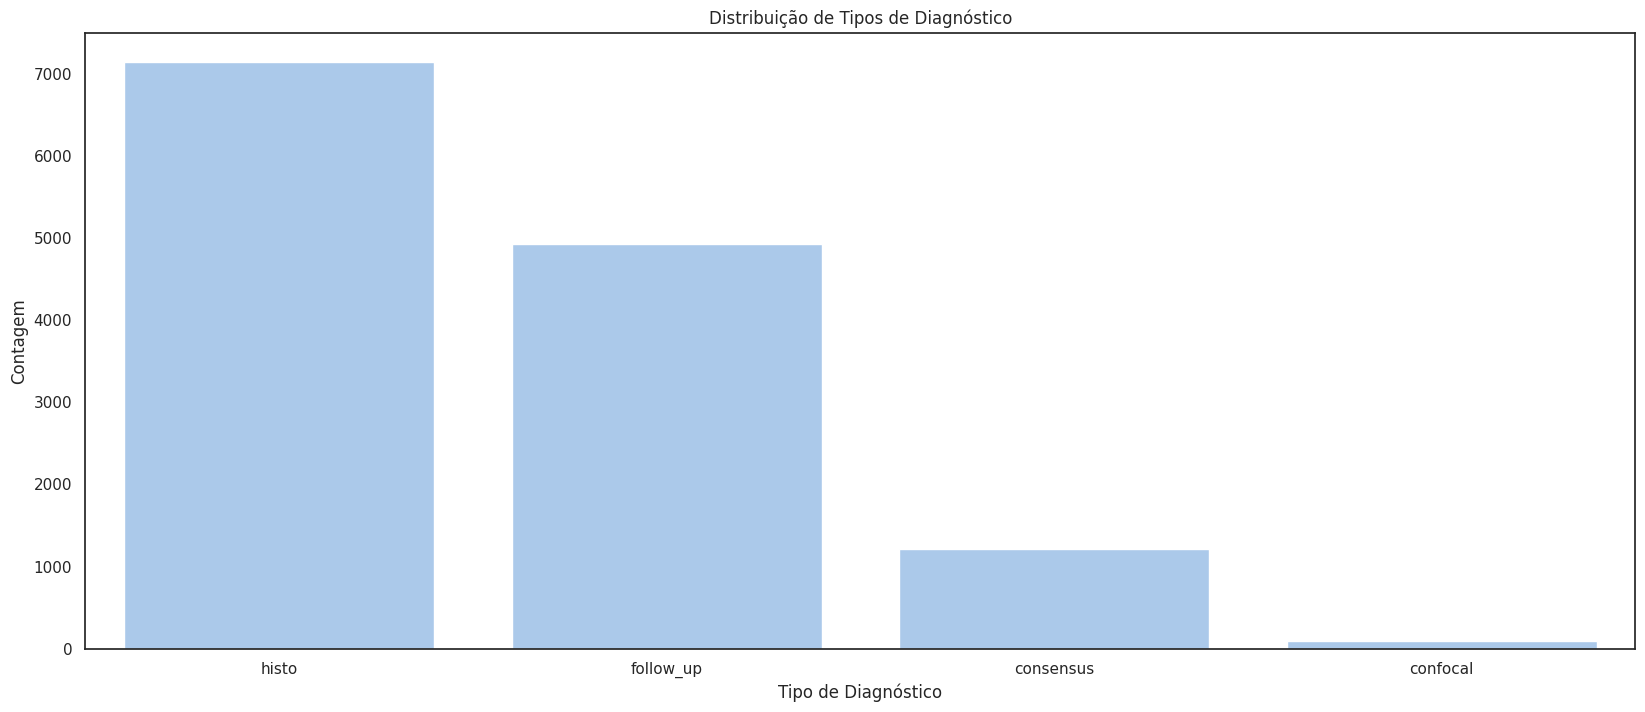

dx_type  count
0      histo   7139
1  follow_up   4917
2  consensus   1206
3   confocal     92

In [ ]:
# Criando df de contagem
df_aux = df_EDA['dx_type'].value_counts().reset_index()

# Criando o gráfico
plt.figure(figsize=(20, 8))
sns.barplot(x=df_aux['dx_type'], y=df_aux['count'])
plt.title('Distribuição de Tipos de Diagnóstico')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Contagem')
plt.show()

# Printando o dataframe
df_aux

O gráfico de barras mostra a contagem de casos para cada categoria de sexo, destacando que:

- Há um leve desbalanceamento em relação ao sexo, sendo  o sexo masculino mais frequente.
- Há um número muito pequeno de casos onde o sexo é desconhecido, com apenas 77 registros.

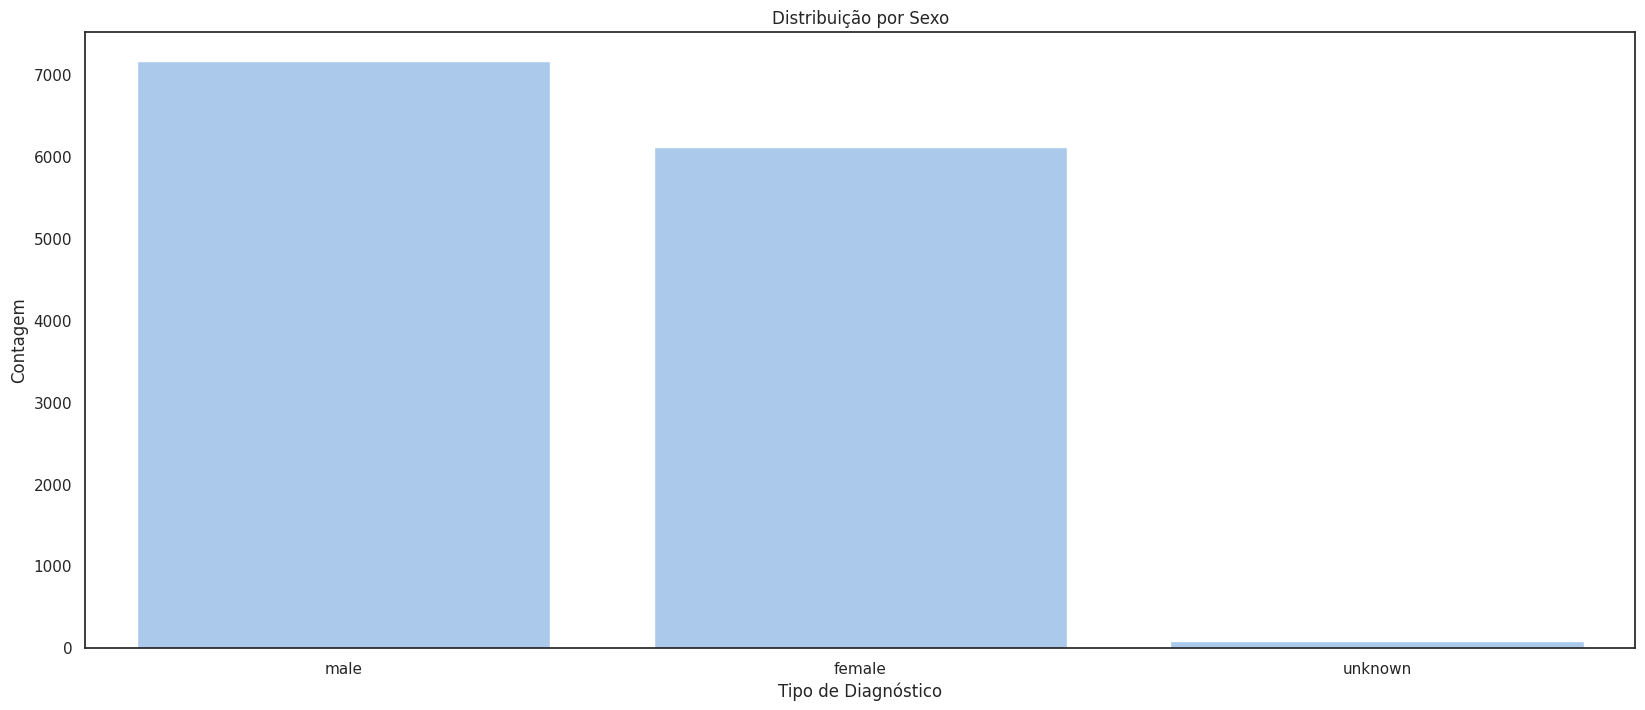

sex  count
0     male   7164
1   female   6113
2  unknown     77

In [ ]:
# Criando df de contagem
df_aux = df_EDA['sex'].value_counts().reset_index()

# Criando o gráfico
plt.figure(figsize=(20, 8))
sns.barplot(x=df_aux['sex'], y=df_aux['count'])
plt.title('Distribuição por Sexo')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Contagem')
plt.show()

# Printando o dataframe
df_aux

O gráfico de barras mostra a contagem de casos para cada categoria de localização, fornecendo as seguintes informações:

- A localização "back" é a mais comum entre as lesões, com 2965 casos registrados.
- Em seguida, há a categoria "lower extremity" (extremidade inferior) com 2744 casos.
- As 6 primeiras barras são responsaveis pela grande maioria dos registros (~85%).
- As localizações menos frequentes incluem "acral" com apenas 7 casos.

Essa análise permite identificar as áreas do corpo mais afetadas por diferentes tipos de lesões de pele no conjunto de dados estudado.

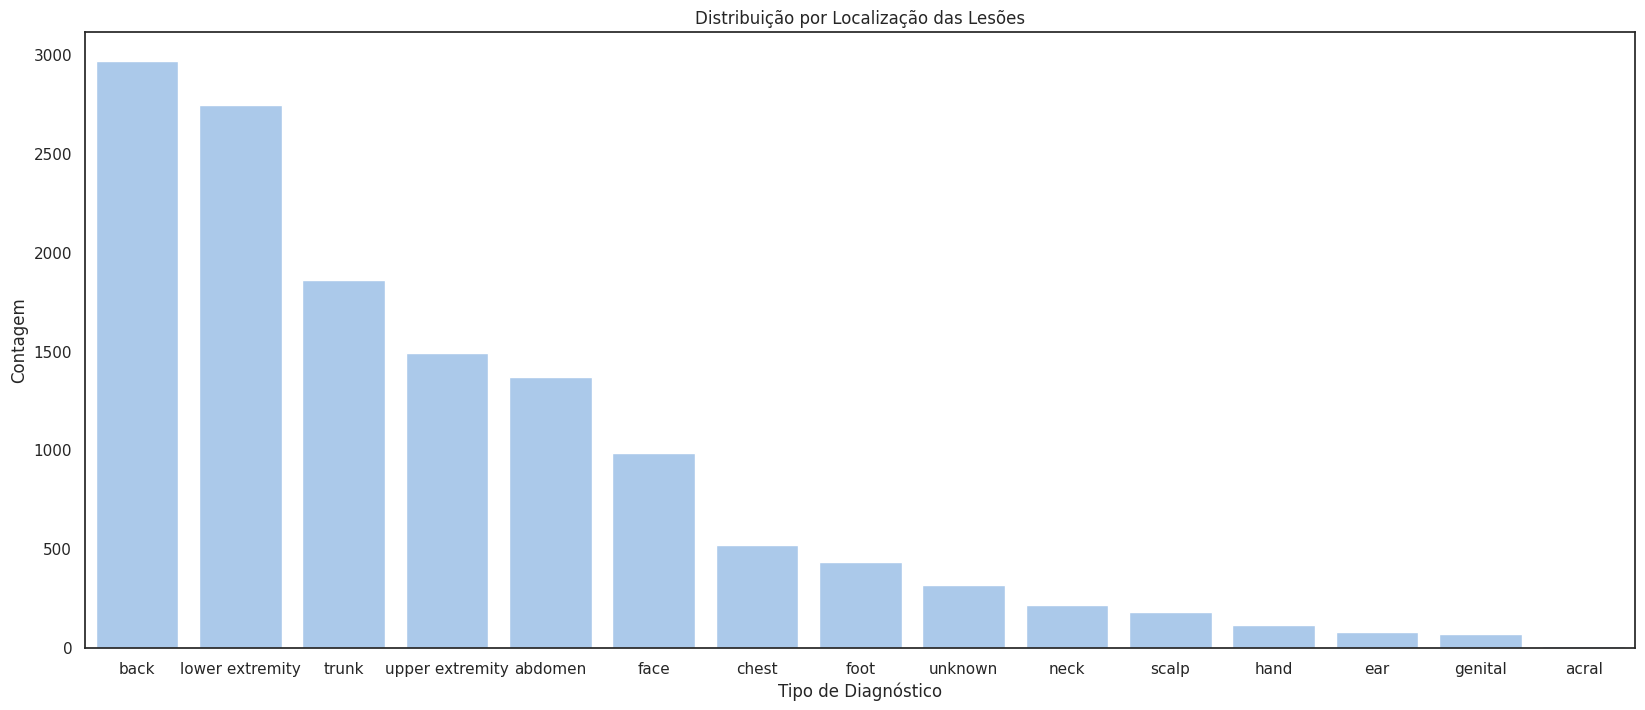

localization  count
0              back   2965
1   lower extremity   2744
2             trunk   1860
3   upper extremity   1490
4           abdomen   1370
5              face    986
6             chest    518
7              foot    434
8           unknown    319
9              neck    217
10            scalp    179
11             hand    117
12              ear     81
13          genital     67
14            acral      7

In [ ]:
# Criando df de contagem
df_aux = df_EDA['localization'].value_counts().reset_index()

# Criando o gráfico
plt.figure(figsize=(20, 8))
sns.barplot(x=df_aux['localization'], y=df_aux['count'])
plt.title('Distribuição por Localização das Lesões')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Contagem')
plt.show()

# Printando o dataframe
df_aux

O histograma e boxplot da variável `age` mostram uma concentração de dados próxima à mediana, com 50% dos dados variando entre 40 e 65 anos (considerando intervalos de 5 anos). Além disso, observa-se uma assimetria negativa, com cauda à esquerda nos dados de idade.

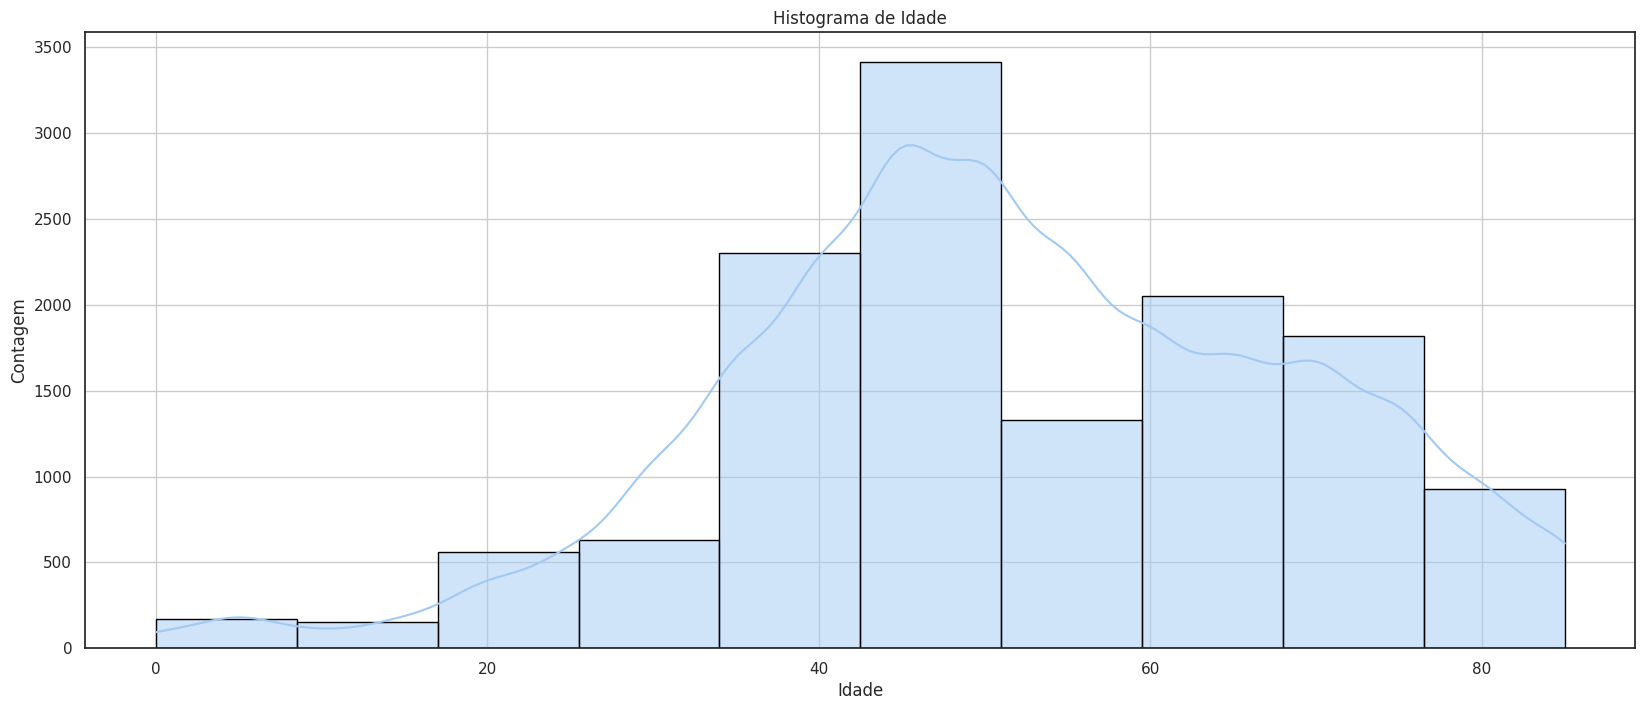

In [ ]:
# Histograma de idade
plt.figure(figsize=(20, 8))
sns.histplot(data=df_EDA, x='age', bins=10, kde=True, edgecolor='black')
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


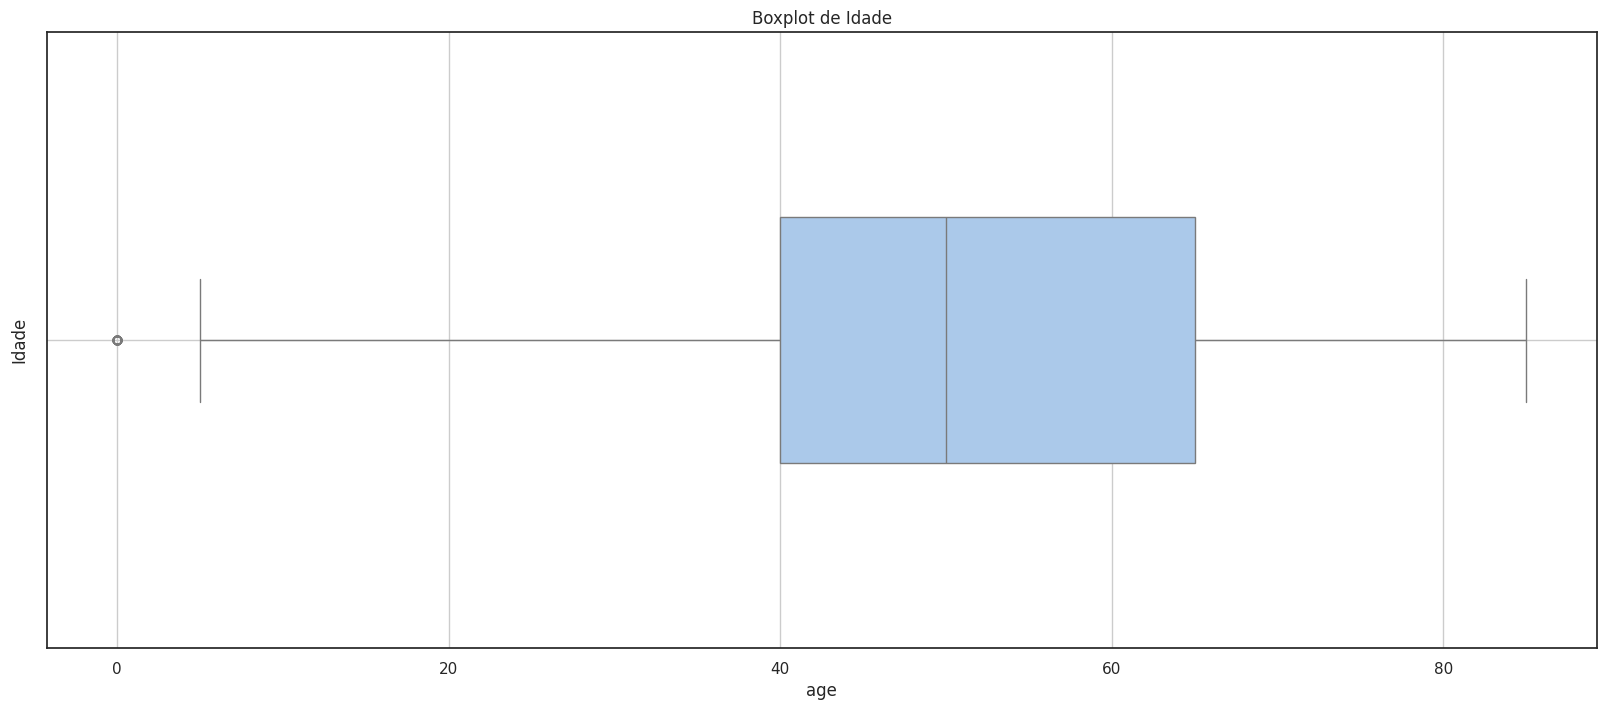

In [ ]:
# Boxplot para idade
plt.figure(figsize=(20, 8))
sns.boxplot(x='age', data=df_EDA, orient='v', width=0.4)
plt.title('Boxplot de Idade')
plt.ylabel('Idade')
plt.grid(True)
plt.show()

O heatmap mostra a contagem de observações para cada combinação de classe de diagnóstico (linhas) e idade (colunas). É evidente a prevalência da classe melanocytic_Nevi, concentrada em torno de 45 anos e distribuída simetricamente em relação a esse valor. As classes benign_keratosis-like_lesions e melanoma exibem um padrão ascendente com o aumento da idade. Por outro lado, as classes actinic_keratoses e basal_cell_carcinoma apresentam valores acima de 55 anos.

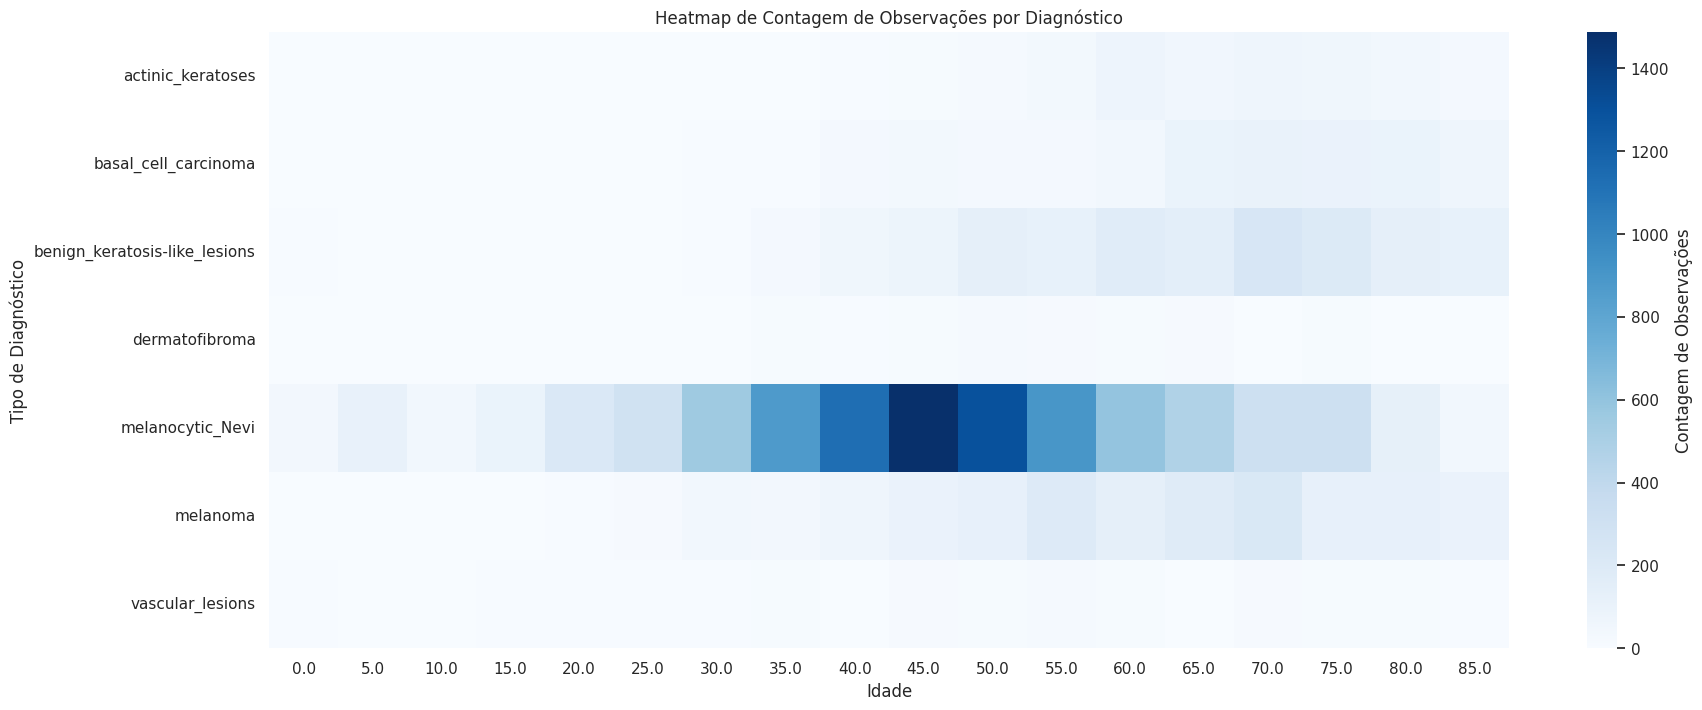

In [ ]:
# Criar uma tabela de contagem
heatmap_data = pd.crosstab(df_EDA['dx'], df_EDA['age'])

# Criar o heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar_kws={'label': 'Contagem de Observações'})

# Configurar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Tipo de Diagnóstico')
plt.title('Heatmap de Contagem de Observações por Diagnóstico')
plt.show()

O heatmap mostra a contagem de observações para cada combinação de tipo de diagnóstico (linhas) e idade (colunas). Assim como observado no gráfico de barras, temos dois tipos predominantes (follow_up e histo) e um com pouquíssimas ocorrências (confocal). O tipo follow_up apresenta uma média em torno de 45 anos, com uma concentração significativa de registros próxima à média de forma simétrica. Por outro lado, o tipo histo mostra uma concentração maior em torno de 70 anos, com assimetria negativa. Os tipos consensus e confocal não mostram um padrão claro.

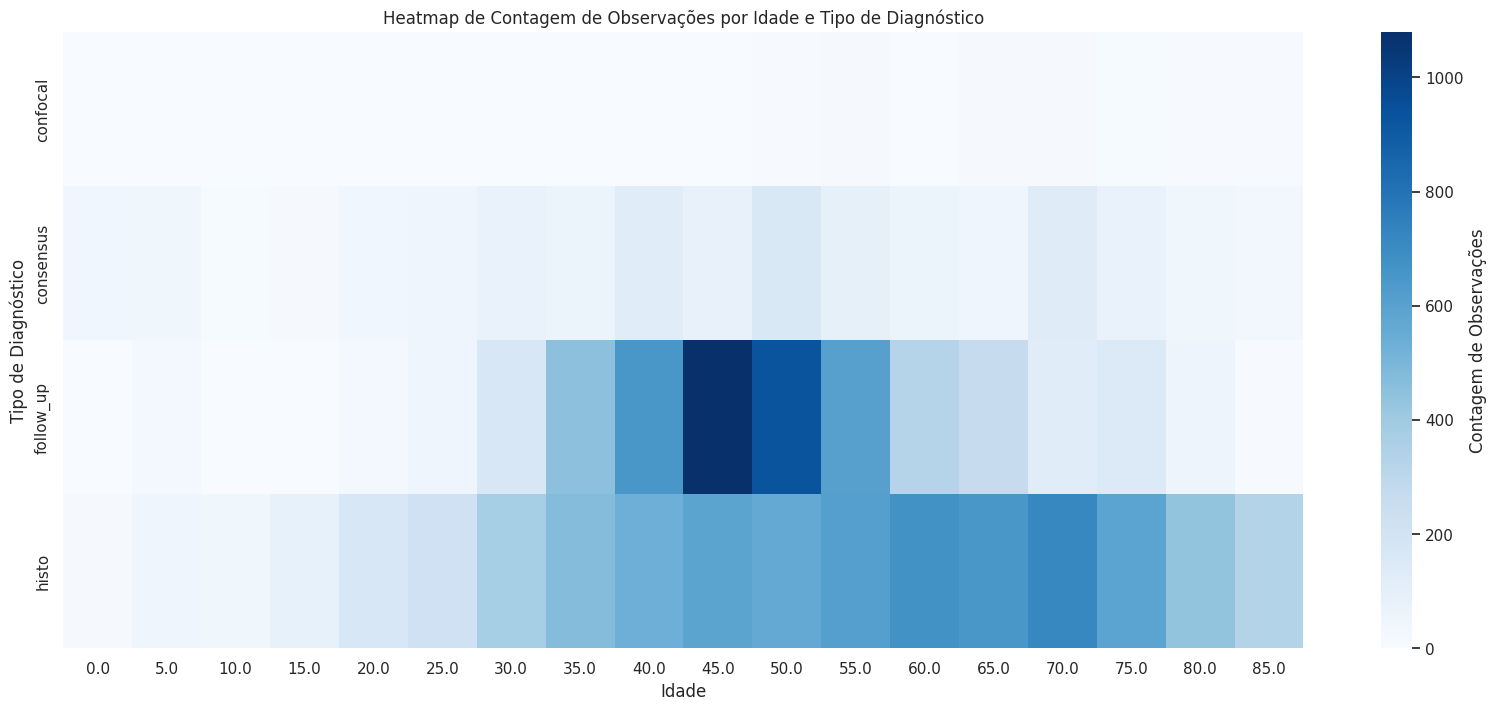

In [ ]:
# Criar uma tabela de contagem
heatmap_data = pd.crosstab(df_EDA['dx_type'], df_EDA['age'])

# Criar o heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar_kws={'label': 'Contagem de Observações'})

# Configurar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Tipo de Diagnóstico')
plt.title('Heatmap de Contagem de Observações por Idade e Tipo de Diagnóstico')
plt.show()

O heatmap mostra a contagem de observações para cada combinação de localização das lesões (linhas) e idade (colunas). Similar ao gráfico de barras, cinco localizações (abdomen, back, lower extremity, trunk, upper extremity) se destacam com cores mais intensas, indicando uma concentração em torno de 45 a 50 anos com distribuição aparentemente simétrica. A localização foot também exibe um padrão semelhante às cinco principais, enquanto face e chest mostram concentrações em torno de 60 a 70 anos com assimetria negativa. As demais localizações são menos visíveis ou não apresentam um padrão claro.

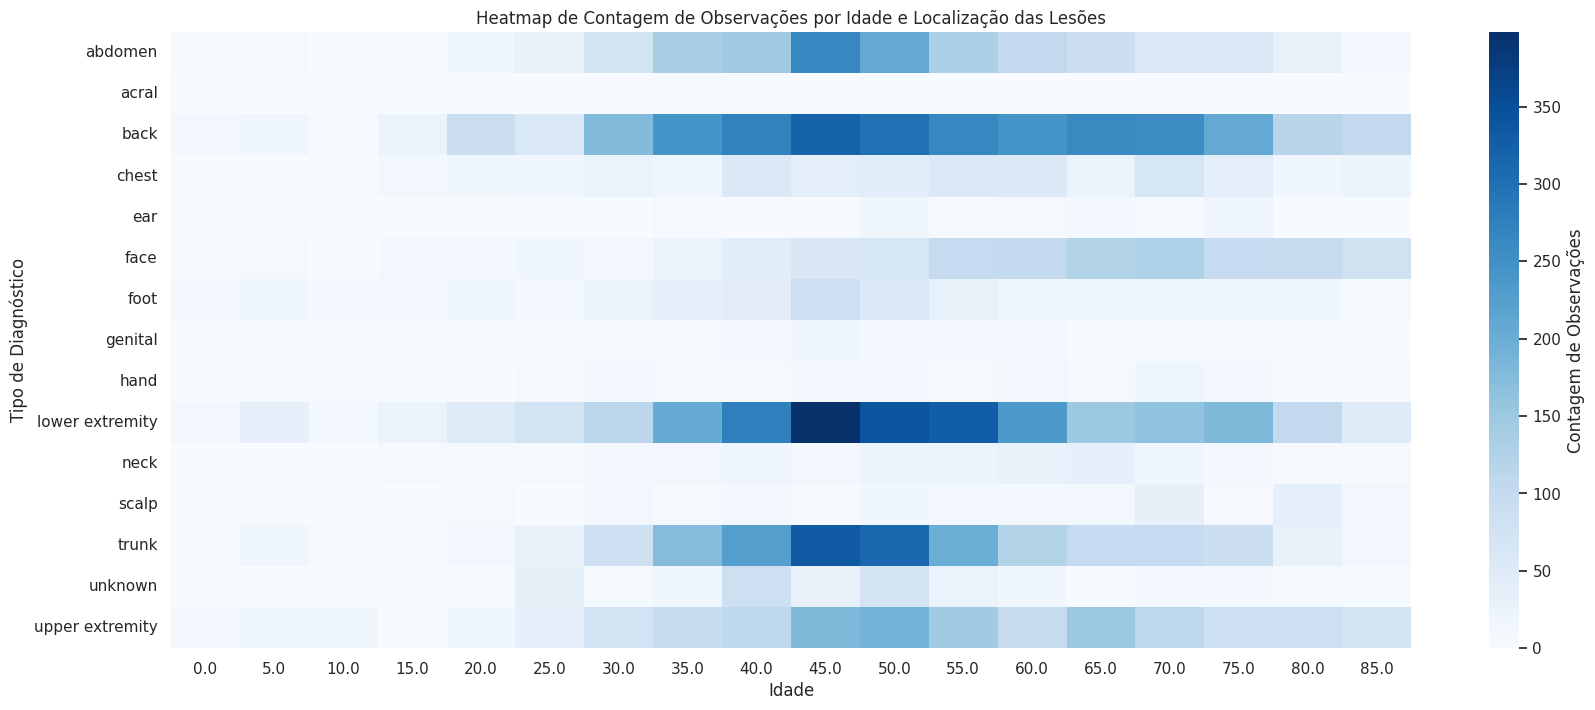

In [ ]:
# Criar uma tabela de contagem
heatmap_data = pd.crosstab(df_EDA['localization'], df_EDA['age'])

# Criar o heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar_kws={'label': 'Contagem de Observações'})

# Configurar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Tipo de Diagnóstico')
plt.title('Heatmap de Contagem de Observações por Idade e Localização das Lesões')
plt.show()

O heatmap mostra a contagem de observações para cada combinação de sexo (linhas) e idade (colunas). Para o sexo feminino, observa-se uma distribuição simétrica em torno de 45 anos. Já para o sexo masculino, os registros estão concentrados um pouco acima, entre 40 e 70 anos, com assimetria negativa. A classe 'desconhecido' é menos visível, com registros apenas em 50 anos.

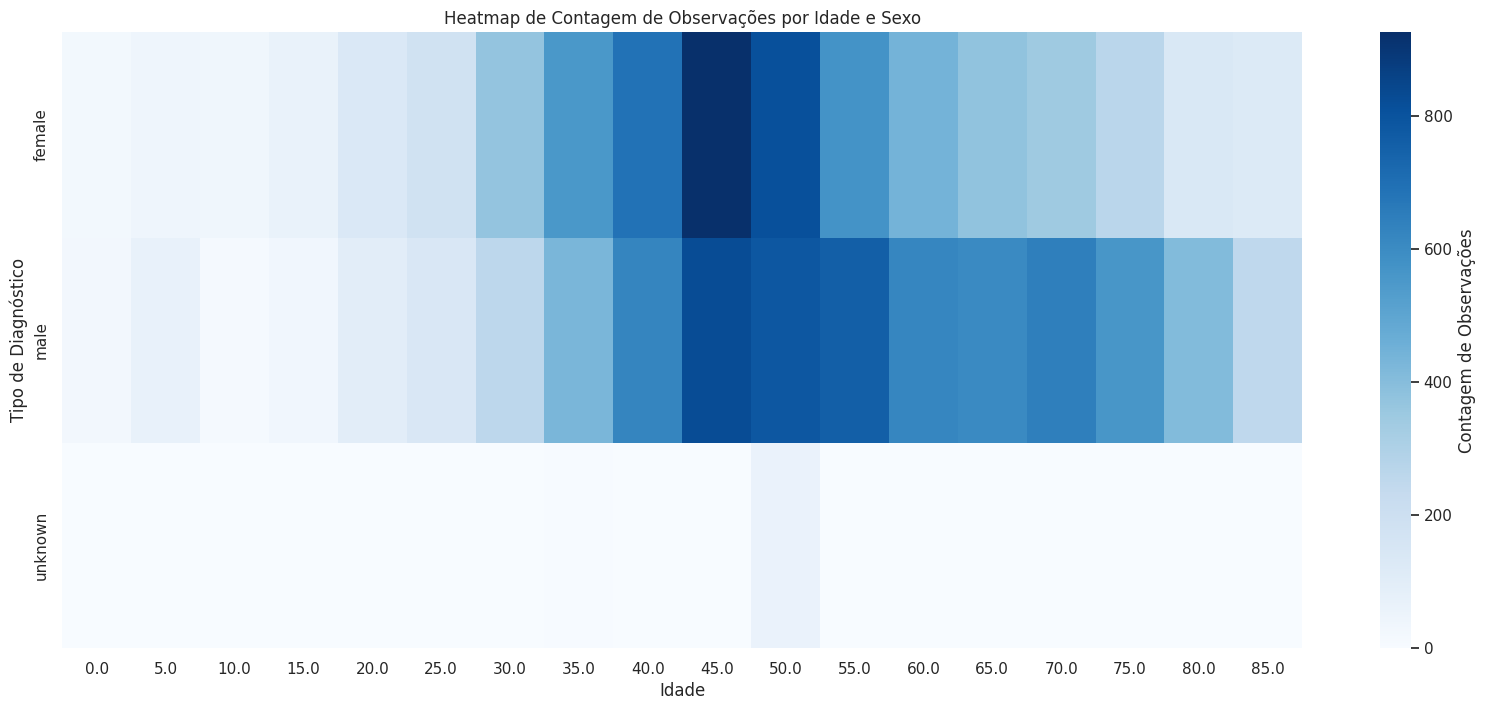

In [ ]:
# Criar uma tabela de contagem
heatmap_data = pd.crosstab(df_EDA['sex'], df_EDA['age'])

# Criar o heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar_kws={'label': 'Contagem de Observações'})

# Configurar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Tipo de Diagnóstico')
plt.title('Heatmap de Contagem de Observações por Idade e Sexo')
plt.show()

O gráfico de coordenadas paralelas apresenta todas as variáveis categóricas como barras coloridas pela idade. De forma geral, é possível observar padrões como quais categorias têm maior relação com as categorias de outras variáveis e quais valores de idade estão presentes em cada subgrupo. Este tipo de visualização facilita a identificação de correlações e tendências entre múltiplas dimensões dos dados.

In [ ]:
# Criar o gráfico de categorias paralelas
fig = px.parallel_categories(
    df_EDA,
    dimensions=['sex', 'dx_type', 'localization', 'dx'],
    color="age",
    color_continuous_scale=px.colors.sequential.Blues,
    labels={'dx_type': 'Tipo de Diagnóstico', 'sex': 'Sexo', 'localization': 'Localização', 'age': 'Idade'}
)

fig.update_layout(
    title="Gráfico de Categorias Paralelas Colorido por Idade",
    coloraxis_colorbar=dict(
        title="Idade"
    ),
    height=800
)

# fig.write_image("/content/parallel_categories_plot.png")
fig.show(config={'staticPlot': True})

# Abordagem "Machine learning clássica"

Antes de explorarmos abordagens mais complexas com redes neurais, implementamos uma abordagem inicial utilizando regressão logística nos dados tabulares, seguida por uma análise com dados tabulares e imagens vetorizadas.

## Dados tabulares

Para os dados tabulares, aplicamos um pipeline com preprocessamento definido anteriormente, seguido de um Grid Search com validação cruzada para otimizar os hiperparâmetros do modelo de regressão logística. Após testar 96 combinações diferentes, o melhor modelo foi selecionado com base na acurácia.

In [ ]:
# Definindo o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

# Criando o pipeline completo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Definindo os parâmetros para o grid search
param_grid = {
    'classifier__penalty': ['l2', None],
    'classifier__C': [0.01,0.1, 1.0, 10.0, 100, 1000],
    'classifier__class_weight': [None, 'balanced'],
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=2, n_jobs=-1)

# Treinando o modelo usando Grid Search
grid_search.fit(train_df, train_labels)

# Melhores parâmetros encontrados pelo grid search
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avaliando o modelo no conjunto de teste
y_pred_test = grid_search.predict(test_df)

# Exibindo métricas de avaliação no conjunto de teste
print("\nRelatório de Classificação no Conjunto de Teste:")
print(classification_report(test_labels, y_pred_test, target_names=label_encoder.classes_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Melhores parâmetros encontrados:
{'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': None}

Relatório de Classificação no Conjunto de Teste:
                               precision    recall  f1-score   support

            actinic_keratoses       0.33      0.02      0.04        42
         basal_cell_carcinoma       0.20      0.03      0.05        67
benign_keratosis-like_lesions       0.44      0.46      0.45       142
               dermatofibroma       0.43      0.21      0.29        14
             melanocytic_Nevi       0.81      0.94      0.87       858
                     melanoma       0.33      0.26      0.29       144
             vascular_lesions       0.00      0.00      0.00        18

                     accuracy                           0.72      1285
                    macro avg       0.36      0.28      0.29      1285
                 weighted avg       0.65      0.72      0.67      1285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


O modelo alcançou uma acurácia geral de 71% no conjunto de teste, destacando-se pela alta precisão e recall para a classe Melanocytic Nevi (80% e 95%, respectivamente). No entanto, teve dificuldades em identificar corretamente classes menos representadas como Melanoma e outras categorias menos frequentes. A interpretabilidade da regressão logística é uma vantagem crucial, permitindo uma análise detalhada das características que influenciam as decisões do modelo para cada classe diagnóstica. Há espaço para melhorias, especialmente para classes menos representadas, considerando estratégias para lidar com desbalanceamento de classes e explorar modelos mais complexos.

## Dados tabulares e imagens vetorizadas

Para a abordagem com dados tabulares e imagens vetorizadas, seguiremos o seguinte plano:


1. **Vetorização das Imagens:**
   - As imagens processadas serão vetorizadas para serem representadas como arrays numéricos.

2. **Aplicação de PCA nos Vetores das Imagens:**
   - Utilizaremos o PCA para reduzir a dimensionalidade dos vetores das imagens. Faremos isso utilizando `GridSearchCV` para determinar os melhores parâmetros do PCA.

3. **Combinação dos Dados Tabulares com os Dados do PCA:**
   - Os dados tabulares previamente processados serão combinados com os dados resultantes do PCA das imagens.

4. **Aplicação da Regressão Logística com GridSearchCV:**
   - Aplicaremos a regressão logística aos dados combinados utilizando `GridSearchCV` para encontrar os melhores hiperparâmetros, considerando tanto os dados tabulares quanto os dados de imagem reduzidos pelo PCA.


5. **Aplicação do Support Vector Machines:**
   - Para captar a não linearidade dos dados, ou seja, informações vindas das imagens, utilizamos um classificador SVC com kernel RBF.



Esse plano visa melhorar a capacidade do modelo em lidar com informações visuais das imagens, mantendo a interpretabilidade oferecida pela regressão logística e explorando o potencial de redução de dimensionalidade proporcionado pelo PCA.

In [ ]:
# Transformações para imagens
transform_tabular = transforms.Compose([
    transforms.Resize((32, 32)),                    # Redimensiona para 32x32 pixels
    transforms.ToTensor(),                          # Converte a imagem para tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])         # Normaliza os pixels
])

In [ ]:
# Função para carregar e preprocessar imagens
def load_and_preprocess_image(df,index):
    transformed_img = transform_tabular(df[index]['image'])
    return np.array(transformed_img.flatten())

In [ ]:
# Carregando e preprocessando imagens para treino e teste
train_images = [load_and_preprocess_image(train , i) for i in range(len(train))]
train_image_df = pd.DataFrame(train_images)
train_df_tabular_and_image = pd.concat(( train_df , train_image_df), axis = 1)

In [ ]:
# Carregando e preprocessando imagens para treino e teste
test_images = [load_and_preprocess_image(test , i) for i in range(len(test))]
test_image_df = pd.DataFrame(test_images)
test_df_tabular_and_image = pd.concat(( test_df , test_image_df), axis = 1)

In [ ]:
# Converter nomes de colunas para strings
train_df_tabular_and_image.columns = train_df_tabular_and_image.columns.astype(str)

test_df_tabular_and_image.columns = test_df_tabular_and_image.columns.astype(str)

In [ ]:
# Separar características que não são de imagem
not_image = numeric_features + categorical_features

In [ ]:
# Identificar características de imagem
image_features = [k for k in  train_df_tabular_and_image.columns if k not in not_image]

In [ ]:
# Definir transformador para PCA das características de imagem
image_transformer = Pipeline(
    steps=[("pca",PCA())]
)

In [ ]:
# Preprocessador para dados tabulares e de imagem
preprocessor_image_tabular = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("img",image_transformer,image_features)
    ],
    remainder='passthrough'
)

In [ ]:
# PCA e Regressão Logística no pipeline final
logreg = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_image_tabular),
    ('classifier', logreg)
])

# Definir a grade de parâmetros para GridSearchCV
param_grid = {
    'preprocessor__img__pca__n_components': [50, 100, 150,250,500,1000],
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['newton-cg', 'lbfgs'],
    'classifier__penalty': ['l2']
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        spa...
                                                                          '16',
                                                                          '17',
                                                                          '18',
                                                                          '19',
                                                                          '20',
                                                                          '21',
                                                                          '22',
                                                                          '23',
                                                                          '24',
                                                                          '25',
                                                                          '26',
                                                                          '27',
                                                                          '28',
                                                                          '29', ...])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           n_jobs=-1,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs'],
                         'preprocessor__img__pca__n_components': [50, 100, 150,
                                                                  250, 500,
                                                                  1000]},
             verbose=2)

In [ ]:
# Treinamento do modelo com GridSearchCV
grid_search.fit(train_df_tabular_and_image, train_labels)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Melhores hiperparâmetros encontrados: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'preprocessor__img__pca__n_components': 50}


In [ ]:
# Avaliação no conjunto de teste
y_pred = grid_search.predict(test_df_tabular_and_image)

# Exibindo métricas de avaliação
print("\nRelatório de Classificação no Conjunto de Teste:")
print(classification_report(test_labels, y_pred, target_names=label_encoder.classes_))


Relatório de Classificação no Conjunto de Teste:
                               precision    recall  f1-score   support

            actinic_keratoses       0.61      0.55      0.57        42
         basal_cell_carcinoma       0.58      0.52      0.55        67
benign_keratosis-like_lesions       0.63      0.52      0.57       142
               dermatofibroma       0.56      0.36      0.43        14
             melanocytic_Nevi       0.86      0.93      0.90       858
                     melanoma       0.50      0.41      0.45       144
             vascular_lesions       0.75      0.67      0.71        18

                     accuracy                           0.78      1285
                    macro avg       0.64      0.57      0.60      1285
                 weighted avg       0.77      0.78      0.77      1285



In [ ]:
svc = SVC(random_state=42, kernel = 'rbf')

# Criar o pipeline com PCA e SVC
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_image_tabular),
    ('classifier', svc)
])

# Definir a grade de parâmetros para GridSearchCV
param_grid = {
    'preprocessor__img__pca__n_components': [50, 100, 150,250,500,1000],
    'classifier__C': [0.01,0.1, 1, 1,10,100, 250],
    'classifier__gamma': ['scale', 'auto']
}



In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'localization',
                                                   'dx_type']),
                                                 ('img',
                                                  Pipeline(steps=[('pca',
                                                                   PCA())]),
                                                  ['0', '1', '2', '3', '4', '5',
                                                   '6', '7', '8', '9', '10',
                                                   '11', '12', '13', '14', '15',
                                                   '16', '17', '18', '19', '20',
                                                   '21', '22', '23', '24', '25',
                                                   '26', '27', '28', '29', ...])])),
                ('classifier', SVC(random_state=42))])

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)


# Treinamento do modelo com GridSearchCV
grid_search.fit(train_df_tabular_and_image, train_labels)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)



Fitting 3 folds for each of 84 candidates, totalling 252 fits
Melhores hiperparâmetros encontrados: {'classifier__C': 10, 'classifier__gamma': 'scale', 'preprocessor__img__pca__n_components': 500}


In [ ]:
y_pred = grid_search.predict(test_df_tabular_and_image)

print(classification_report(test_labels, y_pred, target_names=label_encoder.classes_))


                               precision    recall  f1-score   support

            actinic_keratoses       0.95      0.90      0.93        42
         basal_cell_carcinoma       0.91      0.88      0.89        67
benign_keratosis-like_lesions       0.89      0.88      0.88       142
               dermatofibroma       1.00      0.71      0.83        14
             melanocytic_Nevi       0.96      0.98      0.97       858
                     melanoma       0.93      0.86      0.89       144
             vascular_lesions       1.00      1.00      1.00        18

                     accuracy                           0.95      1285
                    macro avg       0.95      0.89      0.91      1285
                 weighted avg       0.95      0.95      0.95      1285



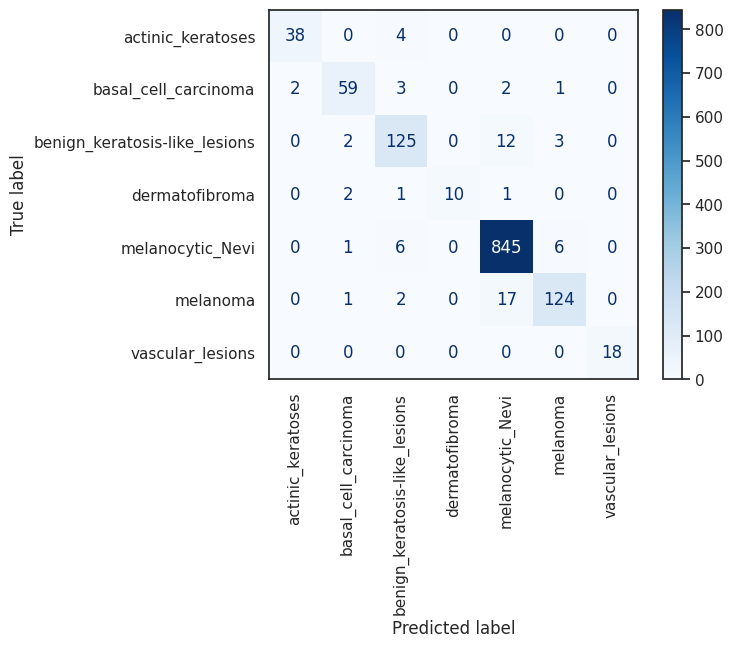

In [ ]:
cm = confusion_matrix(test_labels,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=label_encoder.classes_)


disp.plot(cmap  = 'Blues', xticks_rotation = 'vertical')
plt.show()

Para o  modelo logistico treinado com dados tabulares e imagens vetorizadas alcançou uma acurácia geral de 76% no conjunto de teste. Classes mais frequentes, como Melanocytic Nevi, apresentaram alto recall e precisão, atingindo 95% e 84%, respectivamente. Por outro lado, classes menos representadas, como Vascular Lesions, mostraram desempenho inferior devido ao número limitado de exemplos no conjunto de dados.


Os resultados, a princípio, não são satisfatórios, principalmente devido à baixa precisão e revocação para algumas classes. A inclusão de imagens teve efeito positivo, melhorando as métricas como um todo. Um método de redução de dimensionalidade (PCA) foi necessário; caso contrário, a RAM do Colab (12 GB) seria sobrecarregada. A principal vantagem do modelo logístico, no entanto, é a interpretabilidade, principalmente das variáveis tabulares, o que pode ser relevante para a área médica. No entanto, vale notar que não houve grande esforço na coleta de informações em formato tabular; há poucos meta-dados sobre o paciente, hospital e exame.



Por outro lado, o classificador utilizando support vector machines obteve bom desempenho, principalmente pela capacidade de lidar com padrões não lineares, devido ao truque do kernel.



Em vista do que a inclusão de informações sobre a imagem melhorou o resultado dos modelos, partiremos para explorar as redes neurais, que são um modelo mais flexível e são conhecidas por ter bons resultados em processamento de imagem

# Redes neurais

## LeNet5

https://blog.paperspace.com/writing-lenet5-from-scratch-in-python/



https://medium.com/@iamarjunchandra/mixed-input-data-in-pytorch-cnn-mlp-8aeff336e8a3

https://www.geeksforgeeks.org/lenet-5-architecture/
https://www.educative.io/blog/lenet-5



A LeNet-5 é uma das primeiras e mais conhecidas arquiteturas de redes neurais convolucionais (CNNs), desenvolvida por Yann LeCun e seus colegas em 1998. Essa arquitetura foi projetada para reconhecimento de dígitos manuscritos no conjunto de dados MNIST, mas seus princípios básicos são amplamente aplicáveis em muitas outras tarefas de visão computacional.

#### Estrutura da LeNet-5
A arquitetura é composta por sete camadas, excluindo a camada de entrada:
1. **Camada de Entrada**:
  - **Tamanho**: 32x32 pixels (geralmente uma imagem em escala de cinza, no nosso caso, consideramos imagens RGB).
  - **Função**: Recebe a imagem de entrada.

2. **Camada Convolucional 1 (C1)**:
  - **Filtros**: 6 filtros de tamanho 5x5.
  - **Saída**: 6 mapas de características de 28x28.
  - **Função**: Extrai características básicas da imagem, como bordas e texturas.

3. **Camada de Subamostragem 1 (S2)**:
  - **Tipo**: Pooling (subamostragem) de tamanho 2x2 com stride de 2.
  - **Saída**: 6 mapas de características de 14x14.
  - **Função**: Reduz a dimensionalidade e a sensibilidade a variações de posição.

4. **Camada Convolucional 2 (C3)**:
  - **Filtros**: 16 filtros de tamanho 5x5.
  - **Saída**: 16 mapas de características de 10x10.
  - **Função**: Extrai características mais complexas da imagem.

5. **Camada de Subamostragem 2 (S4)**:
   - **Tipo**: Pooling de tamanho 2x2 com stride de 2.
   - **Saída**: 16 mapas de características de 5x5.
   - **Função**: Reduz ainda mais a dimensionalidade, preservando características importantes.

6. **Camada Convolucional 3 (C5)**:
  - **Filtros**: 120 filtros de tamanho 5x5.
  - **Saída**: 120 unidades.
  - **Função**: Conecta todas as características extraídas das camadas anteriores, funcionando essencialmente como uma camada totalmente conectada.

7. **Camada Totalmente Conectada (F6)**:
  - **Unidades**: 84 neurônios.
  - **Função**: Atua como uma camada de classificação intermediária.

8. **Camada de Saída**:
  - **Unidades**: 10 neurônios (correspondendo aos dígitos de 0 a 9).
  - **Função**: Classifica a imagem de entrada em uma das 10 categorias.

#### Adaptação para nosso problema
1. **Camada de Entrada**:
  - Imagens: 32x32 pixels com 3 canais (RGB).
  - Dados Tabulares: Vetores de características com dimensão especificada (tabular_feature_dim).
2. **Rede para features tabulares**
  - Entrada: um tensor de dimensão (23x1), representando as atributos tabulares.
  - Uma MLP com função de ativação relu, com a intenção de captar a não linearidade, principalmente do atributo idade, é utilizada para extrair as características referentes a parte tabular do conjunto de dados.
  - Para evitar o sobreajuste foi utilizado drop-out nessa rede




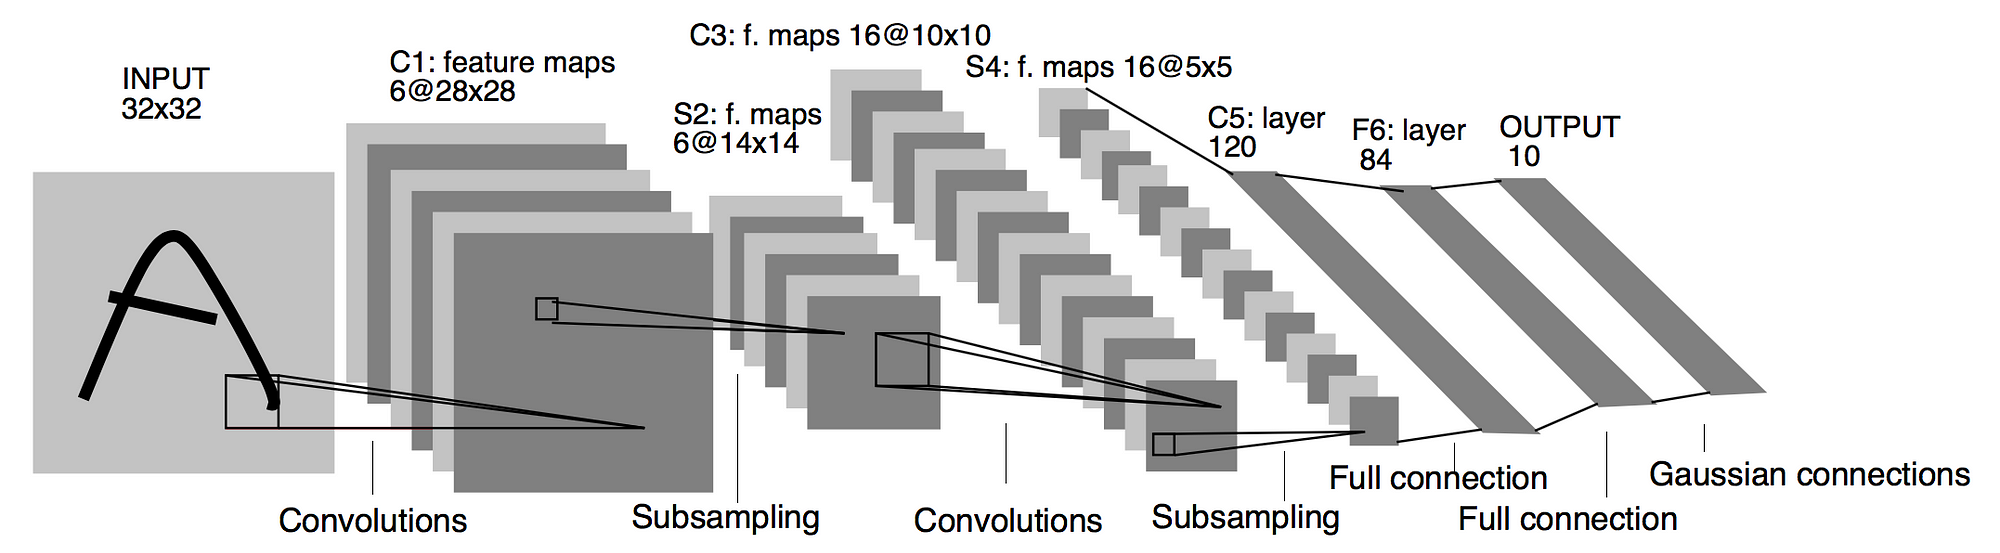

### Treino

In [ ]:
# Transformacao de dados para o lenet5
treino_pytorch  = CustomDataset(data = train,tabular_data =train_df_process, labels = train_labels   ,transform = transform_lenet5)
train_loader = DataLoader(treino_pytorch ,  batch_size=64 , shuffle = True, num_workers = 2)

test_pytorch  = CustomDataset(data = test ,tabular_data =test_df_process, labels = test_labels   ,transform = transform_lenet5)
test_loader = DataLoader(test_pytorch ,  batch_size=64 , shuffle = True, num_workers = 2)

val_pytorch  = CustomDataset(data = val ,tabular_data = val_df_process, labels = val_labels   ,transform = transform_lenet5)
val_loader = DataLoader(val_pytorch ,  batch_size=64 , shuffle = True, num_workers = 2)

In [ ]:


class LeNet5(nn.Module):
    def __init__(self, num_classes, tabular_feature_dim):
        super(LeNet5, self).__init__()

        # A parte antes do full connection da arquitetura
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5, stride=1),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # MLP tabular
        self.fc_tabular = nn.Sequential(
            nn.Linear(tabular_feature_dim, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout()


        )





        # Parte adaptada note que temos    nn.Linear(size_last_layer + 64, 120) == nn.Linear(feature_extractor + resultado MLP nos dados tabulares, 120)
        size_last_layer = 16 * 5 * 5
        self.classifier = nn.Sequential(
            nn.Linear(size_last_layer + 64, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, num_classes)
        )

    def forward(self, image, tabular_data):
        # Rede para imagens
        image_features = self.feature_extractor(image)
        # Da um flatten na imagem
        image_features = image_features.view(image_features.size(0), -1)
        # Rede (MLP) para imagens
        tabular_features = self.fc_tabular(tabular_data)
        # Combina o output  das duas redes
        combined_features = torch.cat((image_features, tabular_features), dim=1)
        # O classificador final deve receber a combinação
        output = self.classifier(combined_features)

        return output


In [ ]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = len(np.unique(np.array(train['dx'])))
learning_rate = 0.001
num_epochs = 150




In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cpu')

In [ ]:
# Definindo o modelo
model = LeNet5(num_classes, len(names)).to(device)

# Definindo a função de perda (loss)
criterion = nn.CrossEntropyLoss()

# Definindo o otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

total_step = len(train_loader)


In [ ]:
model

LeNet5(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_tabular): Sequential(
    (0): Linear(in_features=23, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=464, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linea

In [ ]:

losses_dict = {'train': [], 'validation': []}
for epoch in range(num_epochs):
    # Treinamento do modelo
    model.train()
    running_loss = 0.0

    for i, batch in enumerate(train_loader):
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        additional_features = batch['tabular_features'].to(device)

        outputs = model(images, additional_features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

    # Salvar o modelo após cada época
    model_save_path = f'/content/drive/MyDrive/RN/modelos/LENET5_tabular/modelos_{epoch+1}.pth'
    torch.save(model.state_dict(), model_save_path)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        for batch in val_loader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            additional_features = batch['tabular_features'].to(device)

            outputs = model(images, additional_features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

        average_loss = total_loss / len(val_loader)
        print(f'Loss no conjunto de validação após a época {epoch+1}: {average_loss:.4f}')

    # Armazenar as perdas de treinamento e validação no dicionário
    losses_dict['train'].append(epoch_loss)
    losses_dict['validation'].append(average_loss)

#Salvar o dicionário contendo as perdas
losses_save_path = '/content/drive/MyDrive/RN/modelos/LENET5_tabular/losses_dict.pth'
torch.save(losses_dict, losses_save_path)

Epoch [1/150], Loss: 0.8817
Loss no conjunto de validação após a época 1: 0.7063
Epoch [2/150], Loss: 0.7061
Loss no conjunto de validação após a época 2: 0.6548
Epoch [3/150], Loss: 0.6617
Loss no conjunto de validação após a época 3: 0.6247
Epoch [4/150], Loss: 0.6392
Loss no conjunto de validação após a época 4: 0.6054
Epoch [5/150], Loss: 0.6147
Loss no conjunto de validação após a época 5: 0.5766
Epoch [6/150], Loss: 0.6009
Loss no conjunto de validação após a época 6: 0.6138
Epoch [7/150], Loss: 0.5850
Loss no conjunto de validação após a época 7: 0.5988
Epoch [8/150], Loss: 0.5810
Loss no conjunto de validação após a época 8: 0.5389
Epoch [9/150], Loss: 0.5680
Loss no conjunto de validação após a época 9: 0.5386
Epoch [10/150], Loss: 0.5605
Loss no conjunto de validação após a época 10: 0.5320
Epoch [11/150], Loss: 0.5574
Loss no conjunto de validação após a época 11: 0.5209
Epoch [12/150], Loss: 0.5446
Loss no conjunto de validação após a época 12: 0.5241
Epoch [13/150], Loss: 

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0><function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
        self._shutdown_workers()self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
        if w.is_alive():assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/lib/python3.10/multiprocessing/process.py", line 16

Epoch [66/150], Loss: 0.2804


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Loss no conjunto de validação após a época 66: 0.3112


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    
self._shutdown_workers()Traceback (most recent call last):

  File "/usr/local/lib/pyt

Epoch [67/150], Loss: 0.2773


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__

Traceback (most recent call last):
      File "/usr/local/lib/python3.10/dist-packages/tor

Loss no conjunto de validação após a época 67: 0.3359


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0><function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__

Traceback (most recent call last):
    self._shutdown_workers()  File "/usr/local/lib/pyth

Epoch [68/150], Loss: 0.2758


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>Exception ignored in: 

<function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
        self._shutdown_workers()
self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    
if w.is_alive():
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.10/multiprocessing/process.py", line 16

Loss no conjunto de validação após a época 68: 0.3043


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e7e839bd5a0>
    Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
self._shutdown_workers()    
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
self._shutdown_workers()    if w.is_alive():

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
        if w.is_alive():
assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/lib/python3.10/multiprocessing/process.py", line 1

Epoch [69/150], Loss: 0.2664
Loss no conjunto de validação após a época 69: 0.2846
Epoch [70/150], Loss: 0.2604
Loss no conjunto de validação após a época 70: 0.3077
Epoch [71/150], Loss: 0.2663
Loss no conjunto de validação após a época 71: 0.2995
Epoch [72/150], Loss: 0.2659
Loss no conjunto de validação após a época 72: 0.3178
Epoch [73/150], Loss: 0.2486
Loss no conjunto de validação após a época 73: 0.2909
Epoch [74/150], Loss: 0.2550
Loss no conjunto de validação após a época 74: 0.3371
Epoch [75/150], Loss: 0.2497
Loss no conjunto de validação após a época 75: 0.2801
Epoch [76/150], Loss: 0.2493
Loss no conjunto de validação após a época 76: 0.2789
Epoch [77/150], Loss: 0.2392
Loss no conjunto de validação após a época 77: 0.2947
Epoch [78/150], Loss: 0.2336
Loss no conjunto de validação após a época 78: 0.2983
Epoch [79/150], Loss: 0.2323
Loss no conjunto de validação após a época 79: 0.3303
Epoch [80/150], Loss: 0.2508
Loss no conjunto de validação após a época 80: 0.2815
Epoc

In [ ]:
dict_loss = torch.load('/content/drive/MyDrive/RN/modelos/LENET5_tabular/losses_dict.pth')

In [ ]:
px.line(dict_loss)

### Avaliação

In [ ]:
# Definindo o modelo
model = LeNet5(num_classes, len(names)).to(device)



In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/RN/modelos/LENET5_tabular/modelos_134.pth', map_location='cpu'))

<All keys matched successfully>

In [ ]:
all_predictions = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for i in test_loader:
        image = i['image'].to(device)
        labels = i['label'].to(device)
        additional_features = i['tabular_features'].to(device)

        outputs = model(image, additional_features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Adiciona as previsões e rótulos verdadeiros à lista
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

# Calcula a acurácia
accuracy = 100 * correct / total
print('Accuracy of the network on the test images: {} %'.format(accuracy))



Accuracy of the network on the test images: 93.61867704280155 %


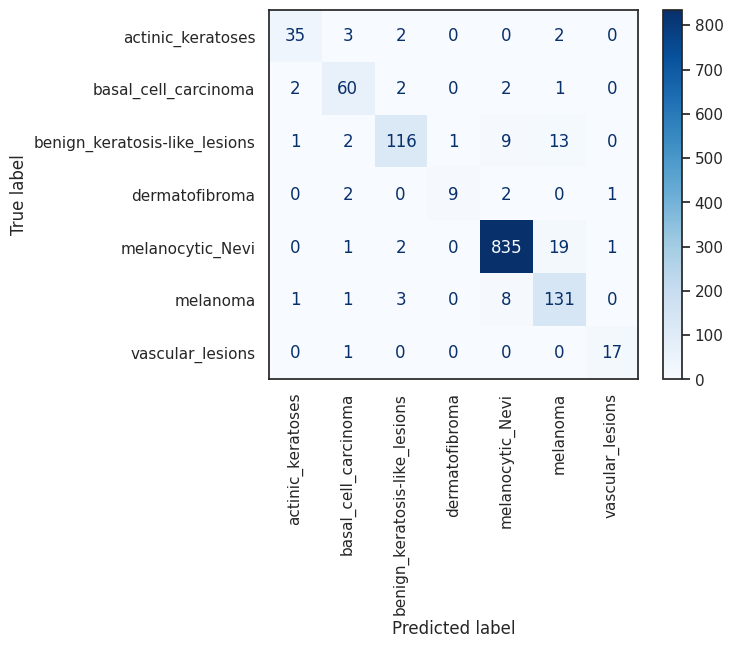

In [ ]:
cm = confusion_matrix(all_labels,all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=label_encoder.classes_)


disp.plot(cmap  = 'Blues', xticks_rotation = 'vertical')
plt.show()

In [ ]:
print(classification_report(all_labels,all_predictions, target_names  =label_encoder.classes_ ))

                               precision    recall  f1-score   support

            actinic_keratoses       0.90      0.83      0.86        42
         basal_cell_carcinoma       0.86      0.90      0.88        67
benign_keratosis-like_lesions       0.93      0.82      0.87       142
               dermatofibroma       0.90      0.64      0.75        14
             melanocytic_Nevi       0.98      0.97      0.97       858
                     melanoma       0.79      0.91      0.85       144
             vascular_lesions       0.89      0.94      0.92        18

                     accuracy                           0.94      1285
                    macro avg       0.89      0.86      0.87      1285
                 weighted avg       0.94      0.94      0.94      1285



Note que o desempenho aqui é bem próximo ao do SVM; no entanto, ainda há algumas classes com pouca precisão. Esse modelo, contudo, foi mais simples de treinar (na CPU, com cada época durando 1 minuto e meio) e não precisou de otimização de hiperparâmetros para obter bons resultados.

O próximo passo é testar uma arquitetura mais recente

## Resnet

https://www.researchgate.net/publication/364345322_Resnet18_Model_With_Sequential_Layer_For_Computing_Accuracy_On_Image_Classification_Dataset
https://www.productteacher.com/quick-product-tips/resnet18-and-resnet50

As aqruiteturas RESNET18 e RESNET18 de rede convolucional foram desenvolvidas por Kaiming He et al. (2015) em um time de pesquisa da Microsoft. Foi introduzido através delas o conceito de aprendizado residual permitindo uma melhoria de performance no treinamento de redes profundas.
Aprendizado residual é a introdução de atalhos entre camadas (*skip connections*), de forma que é traçado um mapeamento residual de camadas que serão puladas. Há uma redução no custo de treinamento e também evita a perda de gradientes.

#### Estrutura da RESNET18
RESNET18 tem 18 camadas:

1. **Camada de Entrada**:
  - **Tamanho**: (224, 224, 3). 224x224 pixels e o canal RGB (geralmente uma imagem em escala de cinza, no nosso caso, consideramos imagens RGB).
  - **Função**: Recebe a imagem de entrada.

2. **Camada 1**:
  - **Filtro**: filtro de tamanho 7x7.

2. **Camada Convolucional 1-4 (idênticas)**
  - **2 Blocos Residuais**:
    - 2 camadas de pesos
    - Uma *skip connection* conectada ao output da segunda camada com ReLu.
      - Se o reultado for igual ao input da camada convolucional, é usada uma conexão identidade. Caso contrário, é usada pooling na *skip connection*

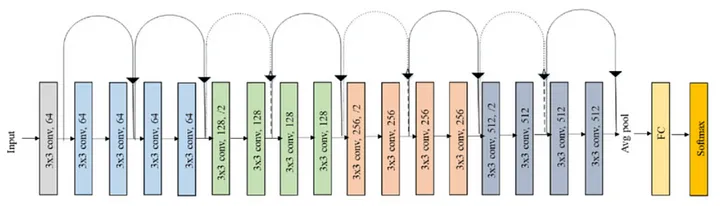

### Processamento

In [ ]:
transform_resnet18

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
treino_pytorch  = CustomDataset(data = train,tabular_data =train_df_process, labels = train_labels   ,transform = transform_resnet18)
train_loader = DataLoader(treino_pytorch ,  batch_size=64 , shuffle = True, num_workers = 0)

In [ ]:
test_pytorch  = CustomDataset(data = test ,tabular_data =test_df_process, labels = test_labels   ,transform = transform_resnet18)
test_loader = DataLoader(test_pytorch ,  batch_size=64 , shuffle = True, num_workers = 0)

In [ ]:
val_pytorch  = CustomDataset(data = val ,tabular_data = val_df_process, labels = val_labels   ,transform = transform_resnet18)
val_loader = DataLoader(val_pytorch ,  batch_size=64 , shuffle = True, num_workers = 0)

### Treino

Primeiramente, optamos por treinar uma rede considerando a atualização dos pesos da rede responsável por extrair características dos atributos tabulares e da rede responsável pela classificação. Testamos uma rede com uma camada a mais na parte responsável pela classificação, mas os resultados não foram satisfatórios, resultando em overfitting.

Note que foram adotados o BatchNorm e o Dropout na rede de classificação, o que foi necessário para evitar o overfitting.

O treinamento foi interrompido na época 70, já que a perda estabilizou e observou-se uma tendência de overfitting

Há uma diferença entre a curva de treinamento e a de validação, com a curva de validação apresentando uma perda menor do que a curva de treinamento. Essa diferença deve-se ao fato de que as camadas com dropout e batch normalization não são aplicadas na fase de validação, mas podem alterar significativamente o cálculo da perda. Desde que as curvas não comecem a crescer rapidamente ou se estabilizem, isso não é um problema.



O tempo de GPU do Colab acabou na época 70, e foi necessário retomar o treinamento depois. O Colab não registrou o resultado das perdas do período 56 até 70; de qualquer forma, o treinamento foi reiniciado a partir da época 70, onde se observa que a perda ainda está diminuindo.

In [ ]:
batch_size = 64
num_classes = len(np.unique(np.array(train['dx'])))
learning_rate = 0.0001
num_epochs = 100



In [ ]:
resnet_18 = torchvision.models.resnet18(weights=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 115MB/s]


In [ ]:
for param in resnet_18.parameters(): param.requires_grad = False

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:


class Resnet18(nn.Module):
    def __init__(self, num_classes, tabular_feature_dim):
        super(Resnet18, self).__init__()

        self.feature_extractor =  resnet_18
        self.feature_extractor.fc = nn.Identity()  # vamos modificar essa camada . A sugestão achada na internet foi simplemente substuir Identidade

        # Rede (MLP) responsável por processar os atributos tabulares
        self.fc_tabular = nn.Sequential(
            nn.Linear(tabular_feature_dim, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout()


        )
        size_last_layer = 512

        # ajuda do gpt de do stack overflow (principalmente para regularização)

        # Rede (MLP) responsável pela classificação. Recebe um vetor com os atributos tabulares e  as imagens processado e retorna o vetor de probabilidades estimadas
        self.classifier = nn.Sequential(
                nn.Linear(size_last_layer + 64, 256),
                nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(256, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(128, num_classes)
            )







    def forward(self, image, tabular_data):
        image_features = self.feature_extractor(image)

        image_features = image_features.view(image_features.size(0), -1)

        tabular_features = self.fc_tabular(tabular_data)

        combined_features = torch.cat((image_features, tabular_features), dim=1)

        output = self.classifier(combined_features)

        return output


In [ ]:
# Definindo o modelo
model = Resnet18(num_classes, len(names)).to(device)

# Definindo a função de perda (loss)
criterion = nn.CrossEntropyLoss()

# Definindo o otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

total_step = len(train_loader)


In [ ]:
model

Resnet18(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [ ]:

losses_dict = {'train': [], 'validation': []}
for epoch in range(num_epochs):
    # Treinamento do modelo
    model.train()
    running_loss = 0.0

    for i, batch in enumerate(train_loader):
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        additional_features = batch['tabular_features'].to(device)

        outputs = model(images, additional_features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

    # Salvar o modelo após cada época
    model_save_path = f'/content/drive/MyDrive/RN/modelos/RESNET/modelos_{epoch+1}.pth'
    torch.save(model.state_dict(), model_save_path)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        for batch in val_loader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            additional_features = batch['tabular_features'].to(device)

            outputs = model(images, additional_features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

        average_loss = total_loss / len(val_loader)
        print(f'Loss no conjunto de validação após a época {epoch+1}: {average_loss:.4f}')

    # Armazenar as perdas de treinamento e validação no dicionário
    losses_dict['train'].append(epoch_loss)
    losses_dict['validation'].append(average_loss)

#Salvar o dicionário contendo as perdas
losses_save_path = '/content/drive/MyDrive/RN/modelos/RESNET/losses_dict.pth'
torch.save(losses_dict, losses_save_path)

Epoch [1/100], Loss: 1.1247
Loss no conjunto de validação após a época 1: 1.0445
Epoch [2/100], Loss: 0.9354
Loss no conjunto de validação após a época 2: 0.8952
Epoch [3/100], Loss: 0.8471
Loss no conjunto de validação após a época 3: 0.7786
Epoch [4/100], Loss: 0.7901
Loss no conjunto de validação após a época 4: 0.7340
Epoch [5/100], Loss: 0.7523
Loss no conjunto de validação após a época 5: 0.6729
Epoch [6/100], Loss: 0.7157
Loss no conjunto de validação após a época 6: 0.6570
Epoch [7/100], Loss: 0.6856
Loss no conjunto de validação após a época 7: 0.6134
Epoch [8/100], Loss: 0.6616
Loss no conjunto de validação após a época 8: 0.5944
Epoch [9/100], Loss: 0.6463
Loss no conjunto de validação após a época 9: 0.5626
Epoch [10/100], Loss: 0.6238
Loss no conjunto de validação após a época 10: 0.5456
Epoch [11/100], Loss: 0.5995
Loss no conjunto de validação após a época 11: 0.5259
Epoch [12/100], Loss: 0.5934
Loss no conjunto de validação após a época 12: 0.5087
Epoch [13/100], Loss: 

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/RN/modelos/RESNET/modelos_70.pth', map_location= device))
model.eval()

Resnet18(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [ ]:

losses_dict = {'train': [], 'validation': []}
for epoch in range(71,101):
    # Treinamento do modelo
    model.train()
    running_loss = 0.0

    for i, batch in enumerate(train_loader):
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        additional_features = batch['tabular_features'].to(device)

        outputs = model(images, additional_features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, 100, epoch_loss))

    # Salvar o modelo após cada época
    model_save_path = f'/content/drive/MyDrive/RN/modelos/RESNET/modelos_{epoch}.pth'
    torch.save(model.state_dict(), model_save_path)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        for batch in val_loader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            additional_features = batch['tabular_features'].to(device)

            outputs = model(images, additional_features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

        average_loss = total_loss / len(val_loader)
        print(f'Loss no conjunto de validação após a época {epoch}: {average_loss:.4f}')

    # Armazenar as perdas de treinamento e validação no dicionário
    losses_dict['train'].append(epoch_loss)
    losses_dict['validation'].append(average_loss)

#Salvar o dicionário contendo as perdas
losses_save_path = '/content/drive/MyDrive/RN/modelos/RESNET/losses_dict.pth'
torch.save(losses_dict, losses_save_path)

Epoch [71/100], Loss: 0.2303
Loss no conjunto de validação após a época 71: 0.1273
Epoch [72/100], Loss: 0.2238
Loss no conjunto de validação após a época 72: 0.1236
Epoch [73/100], Loss: 0.2219
Loss no conjunto de validação após a época 73: 0.1186
Epoch [74/100], Loss: 0.2233
Loss no conjunto de validação após a época 74: 0.1185
Epoch [75/100], Loss: 0.2126
Loss no conjunto de validação após a época 75: 0.1161
Epoch [76/100], Loss: 0.2169
Loss no conjunto de validação após a época 76: 0.1153
Epoch [77/100], Loss: 0.2123
Loss no conjunto de validação após a época 77: 0.1119
Epoch [78/100], Loss: 0.2118
Loss no conjunto de validação após a época 78: 0.1165
Epoch [79/100], Loss: 0.2041
Loss no conjunto de validação após a época 79: 0.1151
Epoch [80/100], Loss: 0.2126
Loss no conjunto de validação após a época 80: 0.1145
Epoch [81/100], Loss: 0.2055
Loss no conjunto de validação após a época 81: 0.1076
Epoch [82/100], Loss: 0.1959
Loss no conjunto de validação após a época 82: 0.1123
Epoc

### Avaliação

In [ ]:
loss_resnet_depois_70 = torch.load('/content/drive/MyDrive/RN/modelos/RESNET/losses_dict.pth')
loss_resnet_ate_56 = torch.load('/content/drive/MyDrive/RN/modelos/RESNET/losses_dict_ate_56.pth')


In [ ]:
px.line(loss_resnet_ate_56)

Note que a perda continua diminuindo tanto no conjunto de validação quanto no conjunto de validação

In [ ]:
px.line(loss_resnet_depois_70)

Este gráfico mostra a perda após a época 70. Note que ela continua diminuindo, aproximando-se de zero nas últimas épocas

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/RN/modelos/RESNET/modelos_100.pth', map_location= device))
model.eval()

Resnet18(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [ ]:

all_predictions = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for i in test_loader:
        image = i['image'].to(device)
        labels = i['label'].to(device)
        additional_features = i['tabular_features'].to(device)

        outputs = model(image, additional_features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Adiciona as previsões e rótulos verdadeiros à lista
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

# Calcula a acurácia
accuracy = 100 * correct / total
print('Accuracy of the network on the test images: {} %'.format(accuracy))


Accuracy of the network on the test images: 97.43190661478599 %


In [ ]:
cm = confusion_matrix(all_labels,all_predictions)

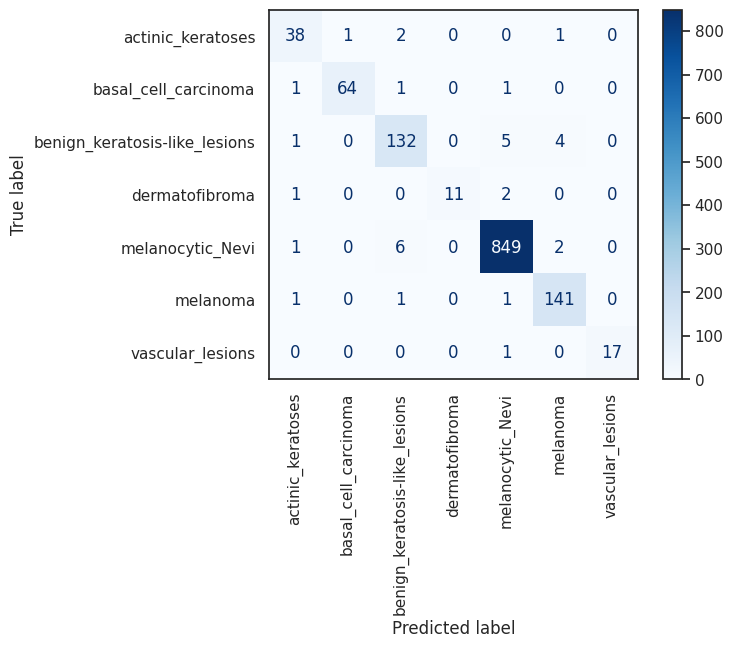

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=label_encoder.classes_)


disp.plot(cmap  = 'Blues', xticks_rotation = 'vertical')
plt.show()

In [ ]:
print(classification_report(all_labels,all_predictions, target_names = label_encoder.classes_ ))

                               precision    recall  f1-score   support

            actinic_keratoses       0.88      0.90      0.89        42
         basal_cell_carcinoma       0.98      0.96      0.97        67
benign_keratosis-like_lesions       0.93      0.93      0.93       142
               dermatofibroma       1.00      0.79      0.88        14
             melanocytic_Nevi       0.99      0.99      0.99       858
                     melanoma       0.95      0.98      0.97       144
             vascular_lesions       1.00      0.94      0.97        18

                     accuracy                           0.97      1285
                    macro avg       0.96      0.93      0.94      1285
                 weighted avg       0.97      0.97      0.97      1285



O resultado, comparado com o Support Vector Machine e a LeNet-5, é bem superior. Contudo, ainda há um erro considerável na identificação da classe dematofibroma, que obteve um recall baixo (0,79) em comparação com as outras classes, que estão todas acima de 0,9.

### Resnet finetuning da camada convolucional

Outra opção é realizar o fine-tuning da última camada convolucional da ResNet.


Nessa abordagem o  fine-tuning da ResNet18 é realizado seguindo o procedimento abaixo:

- A camada 4 da ResNet18 foi utilizada no fine-tuning. Essa camada pode auxiliar na extração de características específicas do modelo, como pigmentação/textura da pele e presença de pelos.
- Uma rede MLP foi treinada para processar os atributos tabulares e seus parâmetros foram ajustados.
- Uma rede MLP com técnicas de regularização (Dropout e BatchNorm) foi utilizada. Observou-se a necessidade de aplicar essas técnicas de regularização devido ao overfitting.
- As três redes acima tiveram seus parâmetros ajustados conjuntamente, portanto os únicos parâmetros que não foram atualizados são os das camadas anteriores à camada 4 da ResNet18.

Essa parte é a principal contribuição do trabalho. Uma solução como essa não é facilmente encontrada em fontes como o Kaggle ou outras na web (pesquisei por um tempo e não encontrei). Futuramente, é interessante estudar a teoria para justificar os passos dados.


Neste treinamento, foi necessário diminuir a taxa de aprendizado (learning rate) de 0,001 para 0,0001, pois inicialmente foi observado um overfitting. O treinamento foi interrompido na época 20 devido à tendência de overfitting e ao fato de a loss já estar muito próxima de 0.

In [ ]:
# Parâmetros para o treinamento da rede
batch_size = 64
num_classes = len(np.unique(np.array(train['dx'])))
learning_rate = 0.0001
num_epochs = 50


In [ ]:
# Baixar a arquitetura do resnet
resnet_18 = torchvision.models.resnet18(weights=True)
for param in resnet_18.parameters(): param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.



In [ ]:


class Resnet18(nn.Module):
    def __init__(self, num_classes, tabular_feature_dim):
        super(Resnet18, self).__init__()

        self.feature_extractor =  resnet_18
        self.feature_extractor.fc = nn.Identity()  # vamos modificar essa camada . A sugestão achada na internet foi simplemente substuir Identidade

        # Rede (MLP) responsável por processar os atributos tabulares
        self.fc_tabular = nn.Sequential(
            nn.Linear(tabular_feature_dim, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout()


        )
        size_last_layer = 512

        # ajuda do gpt de do stack overflow (principalmente para regularização)

        # Rede (MLP) responsável pela classificação. Recebe um vetor com os atributos tabulares e  as imagens processado e retorna o vetor de probabilidades estimadas
        self.classifier = nn.Sequential(
                nn.Linear(size_last_layer + 64, 256),
                nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(256, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(128, num_classes)
            )







    def forward(self, image, tabular_data):
        image_features = self.feature_extractor(image)

        image_features = image_features.view(image_features.size(0), -1)

        tabular_features = self.fc_tabular(tabular_data)

        combined_features = torch.cat((image_features, tabular_features), dim=1)

        output = self.classifier(combined_features)

        return output


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Definindo o modelo
model = Resnet18(num_classes, len(names)).to(device)

# Definindo a função de perda (loss)
criterion = nn.CrossEntropyLoss()

# Definindo o otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

total_step = len(train_loader)


In [ ]:
# Vamos ativar os gradientes da layer4
for param in model.feature_extractor.layer4.parameters(): param.requires_grad = True
for j  in  model.feature_extractor.layer4.parameters():
  print(j.requires_grad )

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
# O treinamento é a mesma coisa, mas os gradientes das layers relevantes foram ativados
losses_dict = {'train': [], 'validation': []}
for epoch in range(num_epochs):
    # Treinamento do modelo
    model.train()
    running_loss = 0.0

    for i, batch in enumerate(train_loader):
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        additional_features = batch['tabular_features'].to(device)

        outputs = model(images, additional_features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

    # Salvar o modelo após cada época
    model_save_path = f'/content/drive/MyDrive/RN/RESNET_FINE_3/modelos_{epoch+1}.pth'
    torch.save(model.state_dict(), model_save_path)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        for batch in val_loader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            additional_features = batch['tabular_features'].to(device)

            outputs = model(images, additional_features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

        average_loss = total_loss / len(val_loader)
        print(f'Loss no conjunto de validação após a época {epoch+1}: {average_loss:.4f}')

    # Armazenar as perdas de treinamento e validação no dicionário
    losses_dict['train'].append(epoch_loss)
    losses_dict['validation'].append(average_loss)

#Salvar o dicionário contendo as perdas
losses_save_path = '/content/drive/MyDrive/RN/RESNET_FINE_3/losses_dict.pth'
torch.save(losses_dict, losses_save_path)

Epoch [1/50], Loss: 1.2746
Loss no conjunto de validação após a época 1: 0.9548
Epoch [2/50], Loss: 0.8127
Loss no conjunto de validação após a época 2: 0.6435
Epoch [3/50], Loss: 0.5681
Loss no conjunto de validação após a época 3: 0.4038
Epoch [4/50], Loss: 0.3868
Loss no conjunto de validação após a época 4: 0.2599
Epoch [5/50], Loss: 0.2556
Loss no conjunto de validação após a época 5: 0.1894
Epoch [6/50], Loss: 0.1845
Loss no conjunto de validação após a época 6: 0.1489
Epoch [7/50], Loss: 0.1548
Loss no conjunto de validação após a época 7: 0.1437
Epoch [8/50], Loss: 0.1343
Loss no conjunto de validação após a época 8: 0.1264
Epoch [9/50], Loss: 0.1218
Loss no conjunto de validação após a época 9: 0.1065
Epoch [10/50], Loss: 0.1087
Loss no conjunto de validação após a época 10: 0.1125
Epoch [11/50], Loss: 0.1095
Loss no conjunto de validação após a época 11: 0.1176
Epoch [12/50], Loss: 0.0974
Loss no conjunto de validação após a época 12: 0.1180
Epoch [13/50], Loss: 0.0877
Loss n

KeyboardInterrupt: 

In [ ]:
#  recupera os pesos na epoca 21
model.load_state_dict(torch.load('/content/drive/MyDrive/RN/modelos/RESNET_FINE_3/modelos_21.pth', map_location= device))
model.eval()

In [ ]:
# continua o treinamento apos a epoca 21
losses_dict = {'train': [], 'validation': []}
for epoch in range(22,51):
    # Treinamento do modelo
    model.train()
    running_loss = 0.0

    for i, batch in enumerate(train_loader):
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        additional_features = batch['tabular_features'].to(device)

        outputs = model(images, additional_features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, 100, epoch_loss))

    # Salvar o modelo após cada época
    model_save_path = f'/content/drive/MyDrive/RN/modelos/RESNET_FINE_3/modelos_{epoch}.pth'
    torch.save(model.state_dict(), model_save_path)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        for batch in val_loader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            additional_features = batch['tabular_features'].to(device)

            outputs = model(images, additional_features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

        average_loss = total_loss / len(val_loader)
        print(f'Loss no conjunto de validação após a época {epoch}: {average_loss:.4f}')

    # Armazenar as perdas de treinamento e validação no dicionário
    losses_dict['train'].append(epoch_loss)
    losses_dict['validation'].append(average_loss)

#Salvar o dicionário contendo as perdas
losses_save_path = '/content/drive/MyDrive/RN/modelos/RESNET_FINE_3/losses_dict.pth'
torch.save(losses_dict, losses_save_path)

Epoch [22/100], Loss: 0.0579
Loss no conjunto de validação após a época 22: 0.0821
Epoch [23/100], Loss: 0.0707
Loss no conjunto de validação após a época 23: 0.0775
Epoch [24/100], Loss: 0.0551
Loss no conjunto de validação após a época 24: 0.0827
Epoch [25/100], Loss: 0.0587
Loss no conjunto de validação após a época 25: 0.0730
Epoch [26/100], Loss: 0.0472
Loss no conjunto de validação após a época 26: 0.0765
Epoch [27/100], Loss: 0.0498
Loss no conjunto de validação após a época 27: 0.0967
Epoch [28/100], Loss: 0.0514
Loss no conjunto de validação após a época 28: 0.0839
Epoch [29/100], Loss: 0.0450
Loss no conjunto de validação após a época 29: 0.0748
Epoch [30/100], Loss: 0.0443
Loss no conjunto de validação após a época 30: 0.0805
Epoch [31/100], Loss: 0.0617
Loss no conjunto de validação após a época 31: 0.1055
Epoch [32/100], Loss: 0.0711
Loss no conjunto de validação após a época 32: 0.0929
Epoch [33/100], Loss: 0.0409
Loss no conjunto de validação após a época 33: 0.0861
Epoc

In [ ]:
loss_resnet_fine = torch.load('/content/drive/MyDrive/RN/modelos/RESNET_FINE_3/losses_dict.pth')

In [ ]:
px.line(loss_resnet_fine)

Note que a perda decaiu rapidamente, atingindo valores próximos de 0 na validação, já por volta da 15ª época

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/RN/modelos/RESNET_FINE_3/modelos_41.pth', map_location= device))
model.eval()

Resnet18(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [ ]:
all_predictions = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for i in test_loader:
        image = i['image'].to(device)
        labels = i['label'].to(device)
        additional_features = i['tabular_features'].to(device)

        outputs = model(image, additional_features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Adiciona as previsões e rótulos verdadeiros à lista
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

# Calcula a acurácia
accuracy = 100 * correct / total
print('Accuracy of the network on the test images: {} %'.format(accuracy))



Accuracy of the network on the test images: 97.66536964980544 %


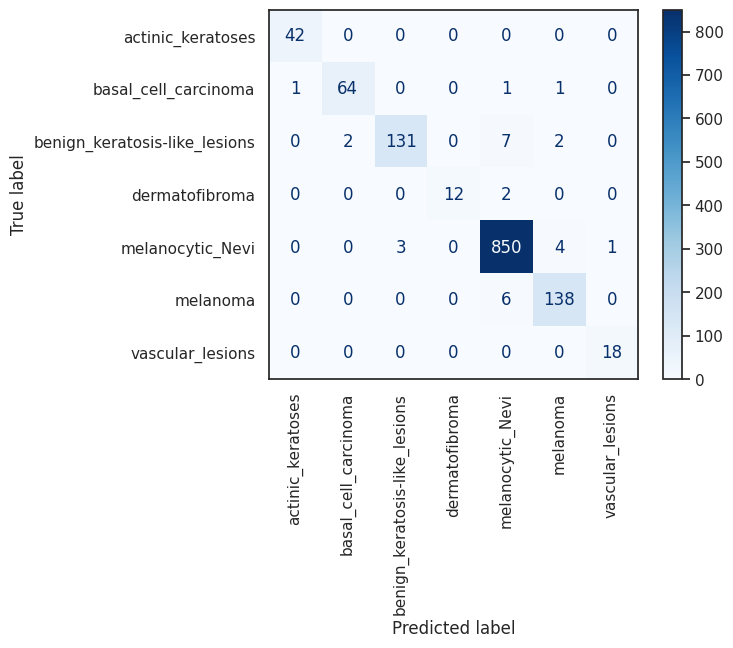

In [ ]:
cm = confusion_matrix(all_labels,all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=label_encoder.classes_)


disp.plot(cmap  = 'Blues', xticks_rotation = 'vertical')
plt.show()

In [ ]:
print(classification_report(all_labels,all_predictions, target_names = label_encoder.classes_ ))

                               precision    recall  f1-score   support

            actinic_keratoses       0.98      1.00      0.99        42
         basal_cell_carcinoma       0.97      0.96      0.96        67
benign_keratosis-like_lesions       0.98      0.92      0.95       142
               dermatofibroma       1.00      0.86      0.92        14
             melanocytic_Nevi       0.98      0.99      0.99       858
                     melanoma       0.95      0.96      0.96       144
             vascular_lesions       0.95      1.00      0.97        18

                     accuracy                           0.98      1285
                    macro avg       0.97      0.95      0.96      1285
                 weighted avg       0.98      0.98      0.98      1285



O treinamento, considerando o fine-tuning na última camada convolucional da ResNet, juntamente com o treinamento de uma rede MLP para os atributos tabulares, obteve um resultado melhor do que o Support Vector Machine (SVC) e a LENET5. No entanto, o resultado foi semelhante ao procedimento que não considera o ajuste fino da última camada da ResNet.

Um ponto positivo é o tempo necessário para que o modelo atinja um bom resultado, que foi mais rápido devido ao fato de que foram necessárias menos épocas para alcançar uma perda pequena.

# Conclusão

Inicialmente, considerando os "atributos tabulares", ou seja, aqueles atributos que podem ser organizados em uma tabela, partimos de um modelo preditivo utilizando a regressão logística, que é um modelo frequentemente utilizado na área médica, principalmente devido à sua interpretabilidade. Esse modelo obteve um desempenho ruim, principalmente considerando que, em algumas classes, o modelo errou todas as predições.

Uma segunda tentativa foi considerar também informações que não podem ser organizadas em uma tabela, no caso, as imagens da pele dos pacientes. Nesse contexto, utilizamos duas abordagens:

1. Transformar a imagem no formato (32x32x3) — 32 x 32 pixels e 3 canais de cores. Juntar os pixels em um vetor coluna de tamanho 32 x 32 x 3 e, em seguida, dado que a matriz tem dimensão (número de observações, 32x32x3 + atributos tabulares), foi necessário utilizar alguma técnica de redução de dimensionalidade. No caso, o PCA foi aplicado ao vetor de pixels das imagens. Uma vez aplicado o PCA, um classificador foi utilizado. Notamos que a regressão logística não obteve bom desempenho, principalmente por não captar não linearidades. Contudo, o Support Vector Machines, que é capaz de modelar padrões não lineares devido ao kernel RBF, obteve bons resultados.

2. Adotar um modelo mais flexível que também aprenda padrões não lineares, por meio de um procedimento capaz de extrair características das imagens (como camadas convolucionais em redes neurais, por exemplo). Nesse sentido, inicialmente utilizamos um modelo semelhante ao LeNet-5, que foi uma das primeiras arquiteturas de redes neurais para classificação de imagens. O desempenho dele foi superior, embora bem próximo ao do Support Vector Machine. Por fim, uma arquitetura mais recente de redes neurais, o ResNet-18, foi utilizada. Um modelo considerando um procedimento de fine-tuning, ajustando a última camada de convoluções da ResNet, uma rede responsável por ajustar os atributos tabulares e uma rede responsável por realizar a classificação, resultou nos resultados mais expressivos do trabalho, atingindo uma acurácia de mais de 97%.
